<a href="https://colab.research.google.com/github/pascale25/idUyhPMVgVMlKK80_stock_forecasting/blob/master/Value_Investor_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background:


We are a portfolio investment company and we make investments in the emerging markets around the world. Our company profits by investing in profitable companies, buying, holding and selling company stocks based on value investing principles.


Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.


## Data Description:


You are given a set of portfolio companies trading data from emerging markets including 2020 Q1-Q2-Q3-Q4 2021 Q1 stock prices. Each company stock is provided in different sheets. Each market's operating days varies based on the country of the company and the market the stocks are exchanged. Use only 2020 data and predict with 2021 Q1 data.



**Goal(s):**


Predict stock price valuations on a daily, weekly and monthly basis. Recommend BUY, HOLD, SELL decisions. Maximize capital returns, minimize losses. Ideally a loss should never happen. Minimize HOLD period.


**Success Metrics:**


Evaluate on the basis of capital returns. Use Bollinger Bands to measure your systems effectiveness.


In [ ]:
https://docs.google.com/spreadsheets/d/1MiunF_O8eNWIcfaOA4PVm668RN7FgLNA0a6U4LWf5Bk/edit?usp=sharing

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

In [3]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None) # replece None to 10 
pd.set_option('display.max_rows', 15)

In [4]:
import os
os.listdir("gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80")

['2020Q1Q2Q3Q4-2021Q1.gsheet',
 'data.gsheet',
 'data.xlsx',
 'dfrus.csv',
 'dfturk.csv',
 'dfdata.csv',
 'Value_Investor_stock_price.ipynb']

In [5]:
data_dir = "gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/data.xlsx"
data_dir

'gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/data.xlsx'

In [ ]:
xls = pd.ExcelFile(data_dir)

In [ ]:
xls.sheet_names

['Russia - Sberbank Rossii PAO (S',
 'Turkey - Koc Holding AS (KCHOL)',
 'Egypt - Medinet Nasr Housing (M',
 'Brazil - Minerva SABrazil (BEEF',
 'Argentina - Pampa Energia SA (P',
 'Colombia - Cementos Argos SA (C',
 'South Africa - Impala Platinum ',
 'South Korea - Dongkuk Steel Mil']

In [ ]:
xls.sheet_names[0]

'Russia - Sberbank Rossii PAO (S'

In [ ]:
dfrus = pd.read_excel(xls,xls.sheet_names[0]).dropna()
dfrus.head(5)
dfrus.tail(5)

Date   Price    Open    High     Low    Vol.  Change %
0  2021-03-31 00:00:00  291.02   294.0  294.42  290.26  47.00M   -0.0076
1  2021-03-30 00:00:00  293.25  294.86  295.72   291.5  38.81M   -0.0002
2  2021-03-29 00:00:00   293.3  289.72  294.09  289.26  43.68M    0.0071
3  2021-03-26 00:00:00  291.22  288.63  292.75  288.32  56.07M    0.0159
4  2021-03-25 00:00:00  286.66   286.5  287.03  283.85  35.22M    0.0030

Date   Price    Open    High     Low    Vol.  Change %
306  2020-01-10 00:00:00  258.19  257.86  259.25  256.88  18.85M    0.0008
307  2020-01-09 00:00:00  257.99   259.4  261.76  257.01  38.33M   -0.0045
308  2020-01-08 00:00:00  259.15  253.57  259.15  253.03  40.82M    0.0207
309  2020-01-06 00:00:00   253.9  254.75  254.84   251.4  22.35M   -0.0043
310  2020-01-03 00:00:00   255.0  255.99  258.19   253.7  35.85M    0.0010

In [ ]:
dfrus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 310
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      311 non-null    object 
 1   Price     311 non-null    object 
 2   Open      311 non-null    object 
 3   High      311 non-null    object 
 4   Low       311 non-null    object 
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    float64
dtypes: float64(1), object(6)
memory usage: 19.4+ KB


In [ ]:
dfrus.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [ ]:
def convert_date(df):
  df['Date'] =  pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
  #df['hours'] =  pd.to_datetime(df['hours'], format= '%H:%M:%S')
  #df['date'] = df['date'].dt.date
  df['year'] = df['Date'].dt.year
  df['month'] = df['Date'].dt.month
  df['day'] = df['Date'].dt.day
  df['hour'] = df['Date'].dt.hour
  df['weekday'] = df['Date'].dt.weekday
  #df['day_name'] = df['date'].dt.weekday_name
  #df['dayofyear'] = df['date'].dt.dayofyear
  return df

In [ ]:
dfrus = pd.read_excel(xls,xls.sheet_names[0]).dropna()
dfrus=convert_date(dfrus)
dfrus["Country"] = "Russia"
dfrus.head(2)

Date   Price    Open    High     Low    Vol.  Change %  year  month  \
0 2021-03-31  291.02   294.0  294.42  290.26  47.00M   -0.0076  2021      3   
1 2021-03-30  293.25  294.86  295.72   291.5  38.81M   -0.0002  2021      3   

   day  hour  weekday Country  
0   31     0        2  Russia  
1   30     0        1  Russia

In [ ]:
xls.sheet_names

['Russia - Sberbank Rossii PAO (S',
 'Turkey - Koc Holding AS (KCHOL)',
 'Egypt - Medinet Nasr Housing (M',
 'Brazil - Minerva SABrazil (BEEF',
 'Argentina - Pampa Energia SA (P',
 'Colombia - Cementos Argos SA (C',
 'South Africa - Impala Platinum ',
 'South Korea - Dongkuk Steel Mil']

In [ ]:
dfturk =  pd.read_excel(xls,xls.sheet_names[1]).dropna()
dfturk = convert_date(dfturk)
dfturk["Country"] = "Turkey"
dfturk.head(2)

Date  Price   Open   High    Low    Vol.  Change %  year  month  day  \
0 2021-03-31  19.41  19.42  19.63  19.27  13.14M   -0.0046  2021      3   31   
1 2021-03-30   19.5  19.12  19.81  19.03  21.05M    0.0209  2021      3   30   

   hour  weekday Country  
0     0        2  Turkey  
1     0        1  Turkey

In [ ]:
dfegy =  pd.read_excel(xls,xls.sheet_names[2]).dropna()
dfegy = convert_date(dfegy)
dfegy['Country'] = 'Egypt'
dfegy.head(2)

Date Price  Open  High   Low   Vol.  Change %  year  month  day  hour  \
0 2021-03-31  3.75  3.74  3.82  3.71  1.57M    0.0054  2021      3   31     0   
1 2021-03-30  3.73  3.71  3.76  3.67  3.43M    0.0081  2021      3   30     0   

   weekday Country  
0        2   Egypt  
1        1   Egypt

In [ ]:
dfbra =  pd.read_excel(xls,xls.sheet_names[3]).dropna()
dfbra = convert_date(dfbra)
dfbra["Country"]="Brazil"
dfbra.head(2)

Date  Price   Open   High    Low   Vol.  Change %  year  month  day  \
0 2021-03-31   10.2  10.35   10.4  10.12  7.77M   -0.0154  2021      3   31   
1 2021-03-30  10.36  10.41  10.62   10.3  9.93M   -0.0105  2021      3   30   

   hour  weekday Country  
0     0        2  Brazil  
1     0        1  Brazil

In [ ]:
dfarg =  pd.read_excel(xls,xls.sheet_names[4]).dropna()
dfarg = convert_date(dfarg)
dfarg['Country']='Argentina'
dfarg.head(2)

Date  Price   Open   High    Low     Vol.  Change %  year  month  day  \
0 2021-03-31  85.15   86.5   88.1  85.15  564.30K   -0.0110  2021      3   31   
1 2021-03-30   86.1  85.15  86.75   84.6  141.40K    0.0129  2021      3   30   

   hour  weekday    Country  
0     0        2  Argentina  
1     0        1  Argentina

In [ ]:
dfcol =  pd.read_excel(xls,xls.sheet_names[5]).dropna()
dfcol = convert_date(dfcol)
dfcol['Country']='Colombia'
dfcol.head(2)

Date   Price    Open    High     Low     Vol.  Change %  year  month  \
0 2021-03-31  5150.0  5100.0  5170.0  5100.0  212.44K    0.0098  2021      3   
1 2021-03-30  5100.0  5010.0  5100.0  5010.0  583.70K    0.0109  2021      3   

   day  hour  weekday   Country  
0   31     0        2  Colombia  
1   30     0        1  Colombia

In [ ]:
dfsaf =  pd.read_excel(xls,xls.sheet_names[6]).dropna()
dfsaf = convert_date(dfsaf)
dfsaf['Country'] = 'SouthAfrica'
dfsaf.head(2)

Date    Price     Open     High      Low   Vol.  Change %  year  \
0 2021-03-31  27373.0  26980.0  27526.0  26657.0  2.49M    0.0177  2021   
1 2021-03-30  26898.0  26766.0  27443.0  26360.0  3.02M   -0.0030  2021   

   month  day  hour  weekday      Country  
0      3   31     0        2  SouthAfrica  
1      3   30     0        1  SouthAfrica

In [ ]:
dfsk =  pd.read_excel(xls,xls.sheet_names[7]).dropna()
dfsk = convert_date(dfsk)
dfsk['Country'] = 'SouthKorea'
dfsk.head(2)

Date    Price     Open     High      Low   Vol.  Change %  year  \
0 2021-03-31  13650.0  13700.0  13750.0  13450.0  0.19K    0.0000  2021   
1 2021-03-30  13650.0  13850.0  14200.0  13050.0  3.17M    0.0074  2021   

   month  day  hour  weekday     Country  
0      3   31     0        2  SouthKorea  
1      3   30     0        1  SouthKorea

# save data to csv 

In [ ]:
#dfrus.to_csv('gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dfrus.csv')
#dfturk.to_csv('gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dfturk.csv')

In [ ]:
#dfs = [dfrus, dfturk, dfcol, dfsaf, dfsk, dfegy, dfbra, dfarg ]
#len(dfs)

In [ ]:
#df = pd.concat(dfs, axis= 0)

In [ ]:
#df.to_csv('gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dfdata.csv')

In [6]:
df = pd.read_csv("gdrive/MyDrive/Apziva_project/ idUyhPMVgVMlKK80/dfdata.csv", parse_dates = ['Date'], index_col = 'Date')

In [7]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [8]:
df.head(5)
df.tail(5)

Price  Open  High  Low    Vol.  Change %  year  month  day  hour  \
Date                                                                           
2021-03-31    291   294   294  290  47.00M   -0.0076  2021      3   31     0   
2021-03-30    293   294   295  291  38.81M   -0.0002  2021      3   30     0   
2021-03-29    293   289   294  289  43.68M    0.0071  2021      3   29     0   
2021-03-26    291   288   292  288  56.07M    0.0159  2021      3   26     0   
2021-03-25    286   286   287  283  35.22M    0.0030  2021      3   25     0   

            weekday Country  
Date                         
2021-03-31        2  Russia  
2021-03-30        1  Russia  
2021-03-29        0  Russia  
2021-03-26        4  Russia  
2021-03-25        3  Russia

Price  Open  High  Low     Vol.  Change %  year  month  day  hour  \
Date                                                                            
2020-01-08     46    47    47   46    1.18M   -0.0231  2020      1    8     0   
2020-01-07     47    48    49   46  901.95K   -0.0186  2020      1    7     0   
2020-01-06     48    48    48   47  719.24K   -0.0061  2020      1    6     0   
2020-01-03     48    48    49   46  595.36K    0.0114  2020      1    3     0   
2020-01-02     48    49    50   47  878.50K   -0.0292  2020      1    2     0   

            weekday    Country  
Date                            
2020-01-08        2  Argentina  
2020-01-07        1  Argentina  
2020-01-06        0  Argentina  
2020-01-03        4  Argentina  
2020-01-02        3  Argentina

In [ ]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
year        0
month       0
day         0
hour        0
weekday     0
Country     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2498 entries, 2021-03-31 to 2020-01-02
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2498 non-null   int64  
 1   Open      2498 non-null   int64  
 2   High      2498 non-null   int64  
 3   Low       2498 non-null   int64  
 4   Vol.      2498 non-null   object 
 5   Change %  2498 non-null   float64
 6   year      2498 non-null   int64  
 7   month     2498 non-null   int64  
 8   day       2498 non-null   int64  
 9   hour      2498 non-null   int64  
 10  weekday   2498 non-null   int64  
 11  Country   2498 non-null   object 
dtypes: float64(1), int64(9), object(2)
memory usage: 253.7+ KB


In [ ]:
df.shape

(2498, 12)

In [ ]:
df['Country'].unique()

array(['Russia', 'Turkey', 'Colombia', 'SouthAfrica', 'SouthKorea',
       'Egypt', 'Brazil', 'Argentina'], dtype=object)

In [ ]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'year', 'month',
       'day', 'hour', 'weekday', 'Country', 'shifted', 'change', 'return',
       'pct_return_3d'],
      dtype='object')

In [ ]:
#df.Price.unique()

In [ ]:
df['Vol.'].unique()

array(['47.00M', '38.81M', '43.68M', ..., '719.24K', '595.36K', '878.50K'],
      dtype=object)

In [ ]:
# repplace M and k symbole 
df['volume'] = df['Vol.'].str.replace('K', '000')
df['volume'] = df['volume'].str.replace('M', '000000')
volume = df['volume']
volume = pd.to_numeric(volume, errors='ignore')
df['volume']= volume
df['volume'].unique()

array(['47.00000000', '38.81000000', '43.68000000', ..., '719.24000',
       '595.36000', '878.50000'], dtype=object)

In [ ]:
df['Price'] = df['Price'].astype(int)
df['Open'] = df['Open'].astype(int)
df['High'] = df['High'].astype(int)
df['Low'] = df['Low'].astype(int)
#df['volume'] = df['volume'].astype(float)
#df.drop(df['Vol.'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2498 entries, 2021-03-31 to 2020-01-02
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2498 non-null   int64  
 1   Open      2498 non-null   int64  
 2   High      2498 non-null   int64  
 3   Low       2498 non-null   int64  
 4   Vol.      2498 non-null   object 
 5   Change %  2498 non-null   float64
 6   year      2498 non-null   int64  
 7   month     2498 non-null   int64  
 8   day       2498 non-null   int64  
 9   hour      2498 non-null   int64  
 10  weekday   2498 non-null   int64  
 11  Country   2498 non-null   object 
dtypes: float64(1), int64(9), object(2)
memory usage: 253.7+ KB


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
df.index

DatetimeIndex(['2021-03-31', '2021-03-30', '2021-03-29', '2021-03-26',
               '2021-03-25', '2021-03-24', '2021-03-23', '2021-03-22',
               '2021-03-19', '2021-03-18',
               ...
               '2020-01-15', '2020-01-14', '2020-01-13', '2020-01-10',
               '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06',
               '2020-01-03', '2020-01-02'],
              dtype='datetime64[ns]', name='Date', length=2498, freq=None)

In [ ]:
#df['Date'].min()
#df['Date'].max()
#df['Date'].max() - df['Date'].min()

In [ ]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'year', 'month',
       'day', 'hour', 'weekday', 'Country'],
      dtype='object')

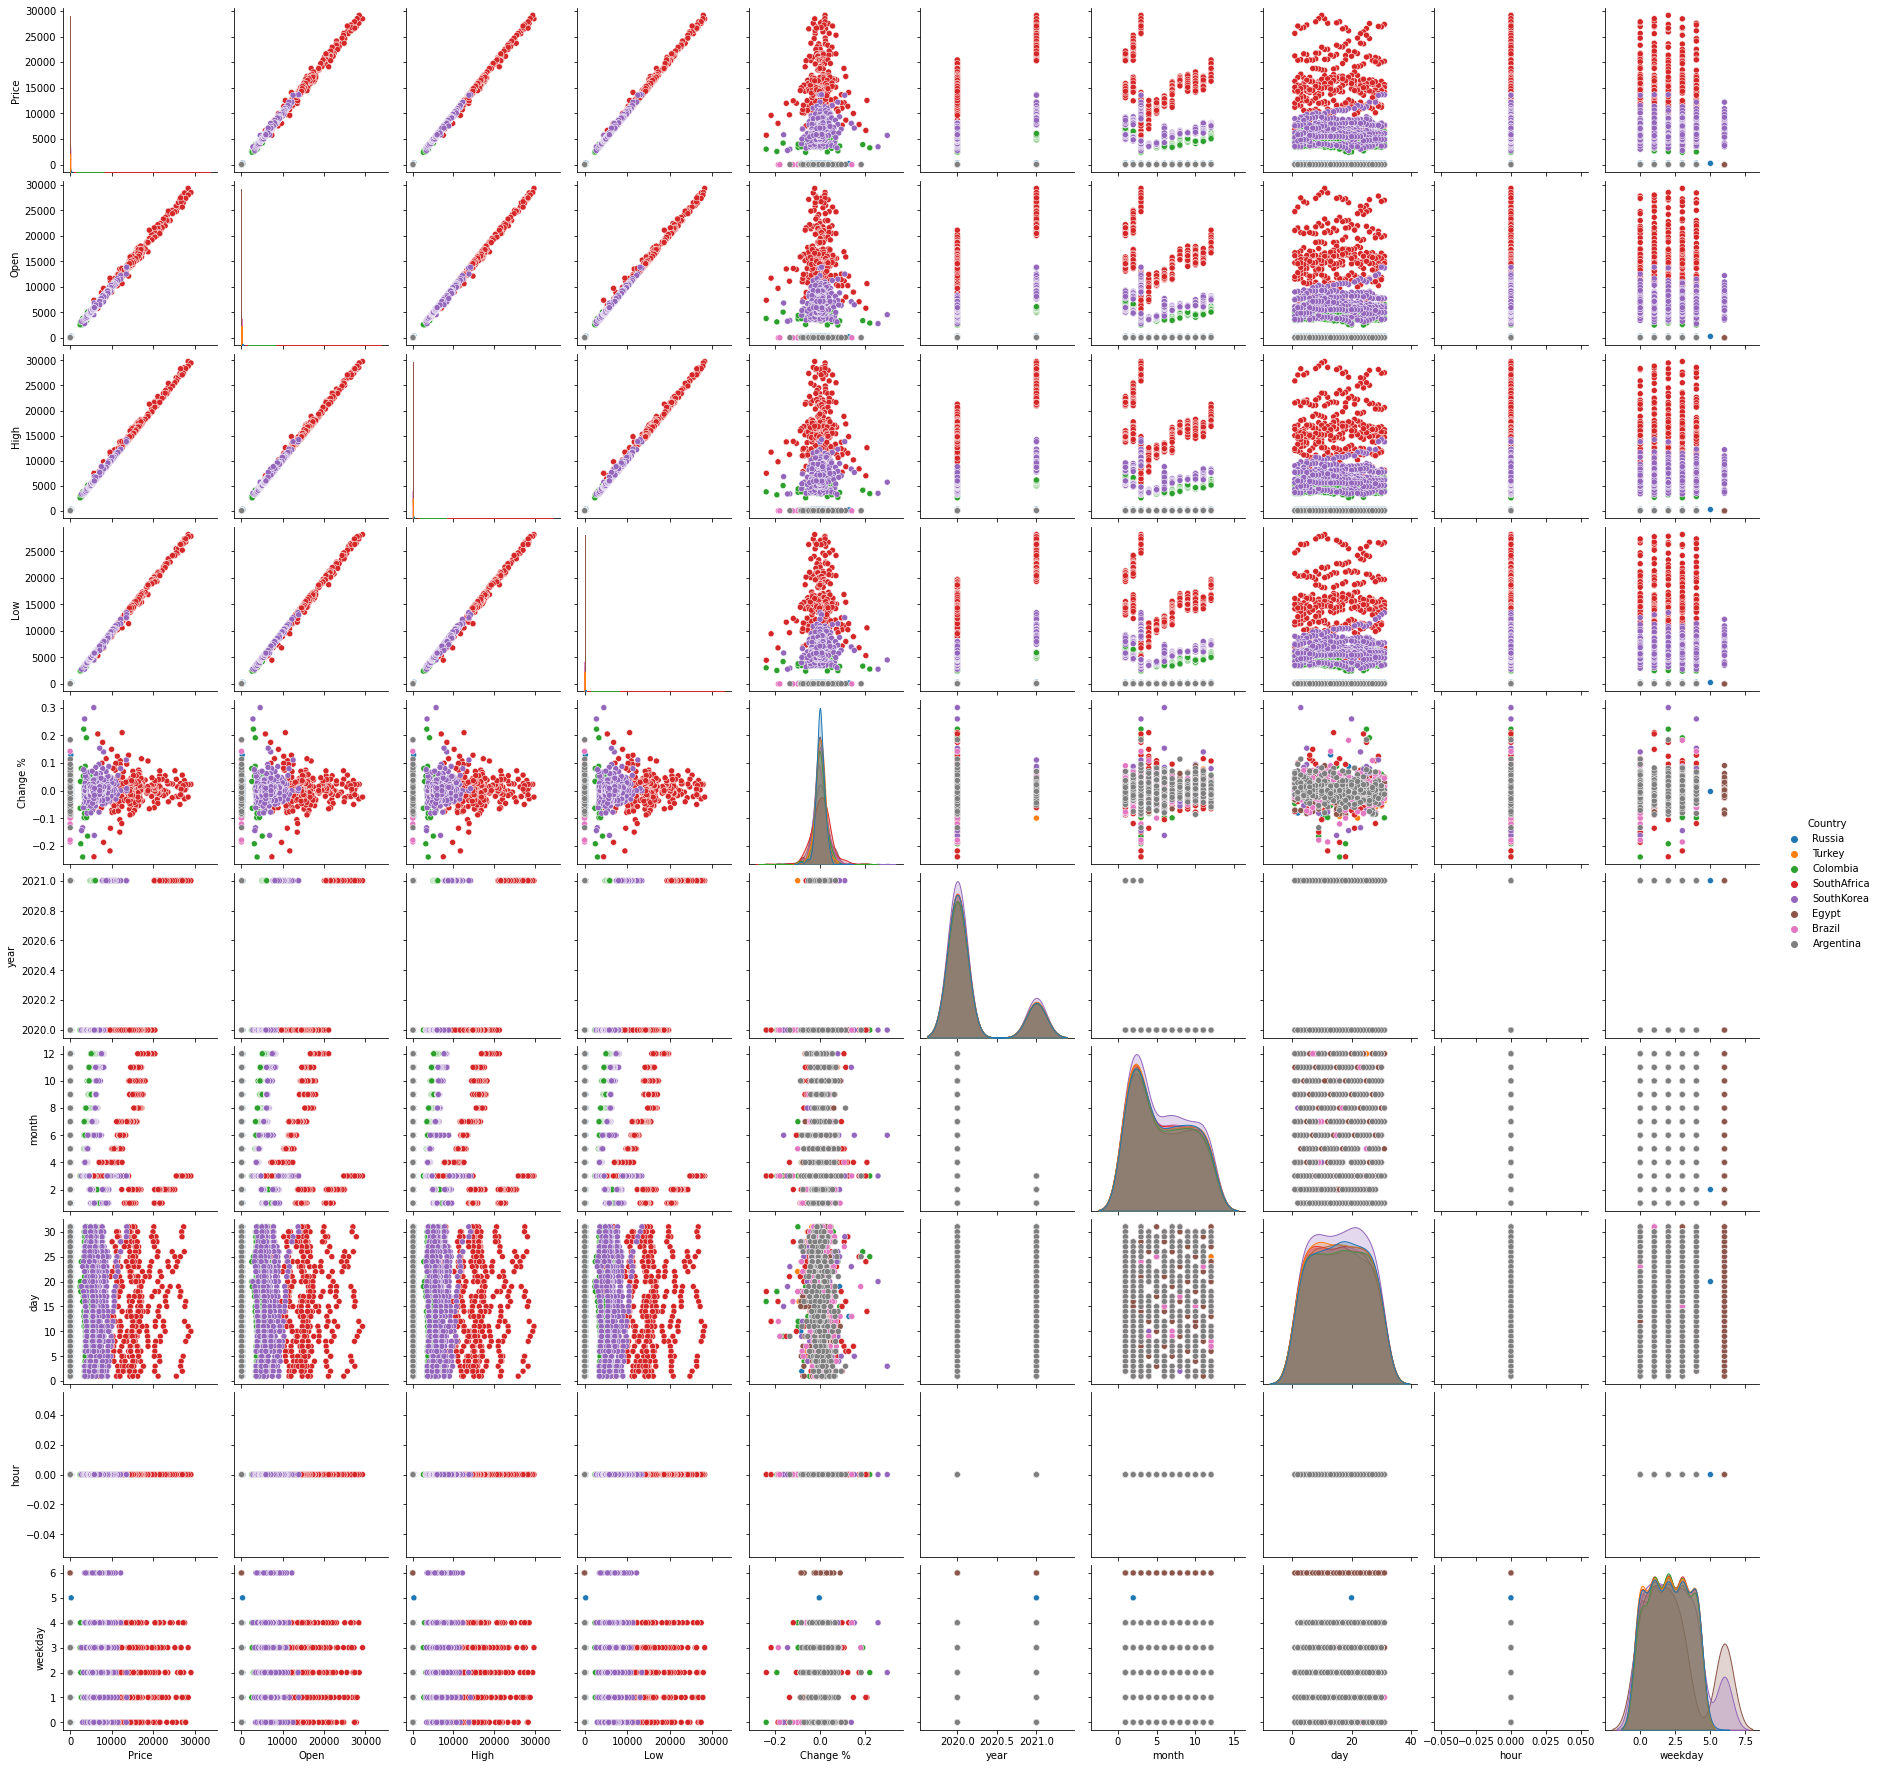

In [ ]:
sns.pairplot(df.reset_index(), hue="Country", corner=False)

# Compare annual stock price trends

In [ ]:
co = df[['Price', 'Country']]
co.head(2)

Price Country
Date                     
2021-03-31    291  Russia
2021-03-30    293  Russia

In [ ]:
co = co.pivot(columns='Country', values= 'Price')
co.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02       48.0    12.0    7120.0    4.0     NaN      14330.0   
2020-01-03       48.0    12.0    7000.0    NaN   255.0      14843.0   
2020-01-05        NaN     NaN       NaN    4.0     NaN          NaN   
2020-01-06       48.0    12.0       NaN    4.0   253.0      14620.0   
2020-01-07       47.0    13.0    6950.0    NaN     NaN      14500.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-02      5850.0    20.0  
2020-01-03      5900.0    20.0  
2020-01-05         NaN     NaN  
2020-01-06      5730.0    20.0  
2020-01-07      5690.0    19.0

In [ ]:
co.columns

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey'],
      dtype='object', name='Country')

In [ ]:
co.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-12', '2020-01-13',
               ...
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-28', '2021-03-29',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', name='Date', length=387, freq=None)

<Figure size 1080x720 with 0 Axes>

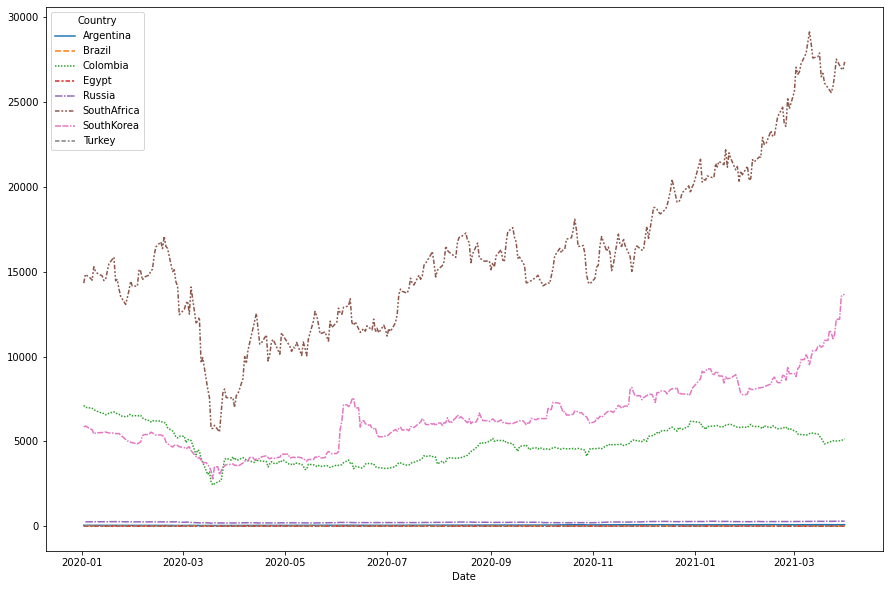

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co)

<Figure size 1080x720 with 0 Axes>

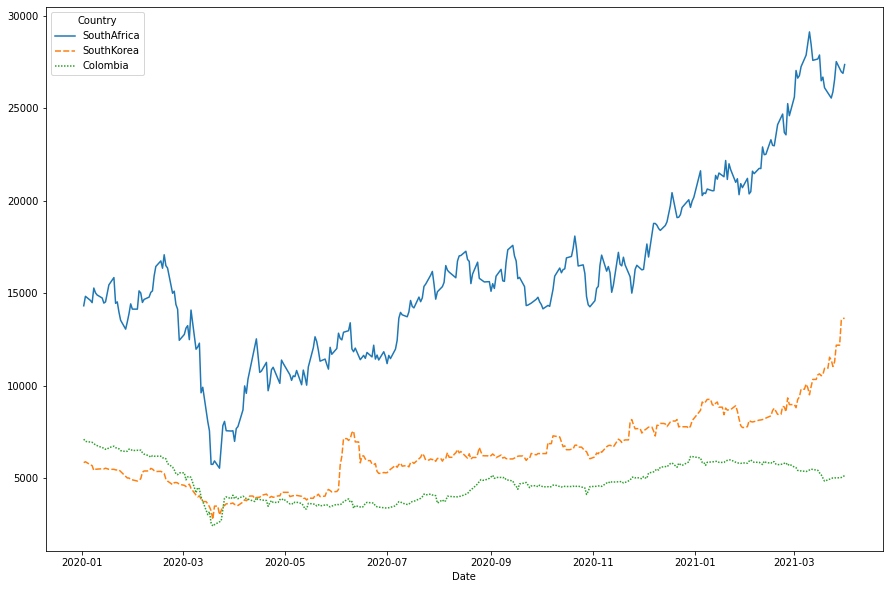

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co[['SouthAfrica','SouthKorea','Colombia']])

<Figure size 1080x720 with 0 Axes>

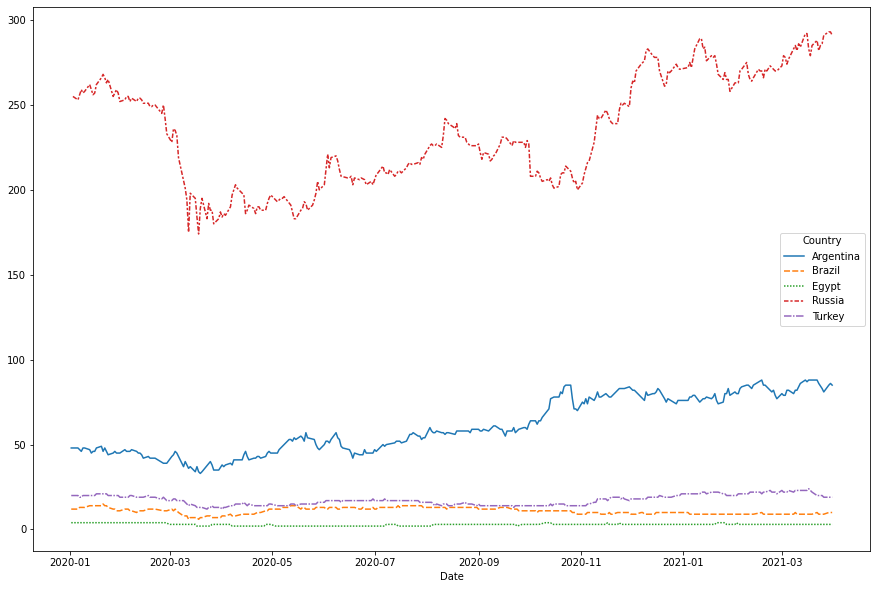

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co[['Argentina', 'Brazil', 'Egypt', 'Russia', 'Turkey']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

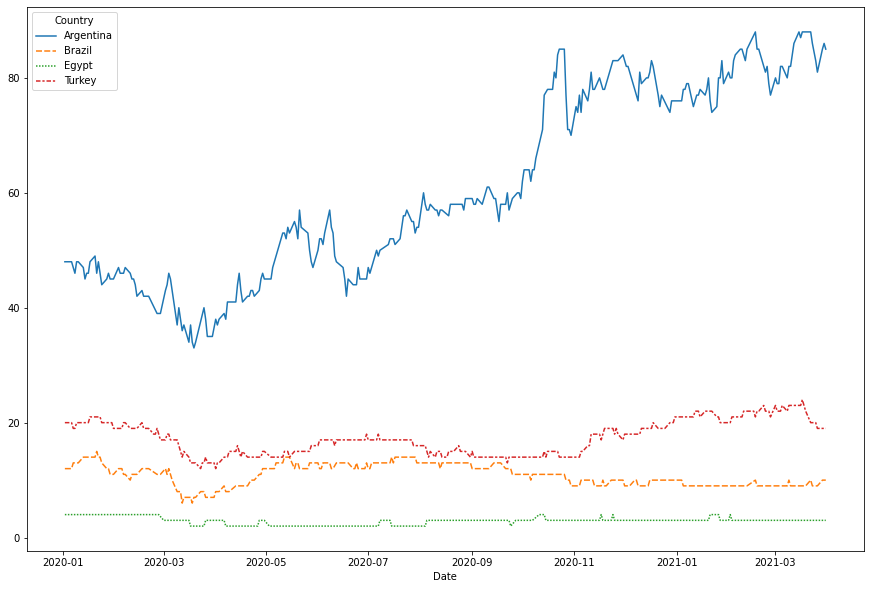

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co[['Argentina', 'Brazil', 'Egypt', 'Turkey']]) # SouthAfrica','SouthKorea','Colombia','Russia',

<Figure size 1080x720 with 0 Axes>

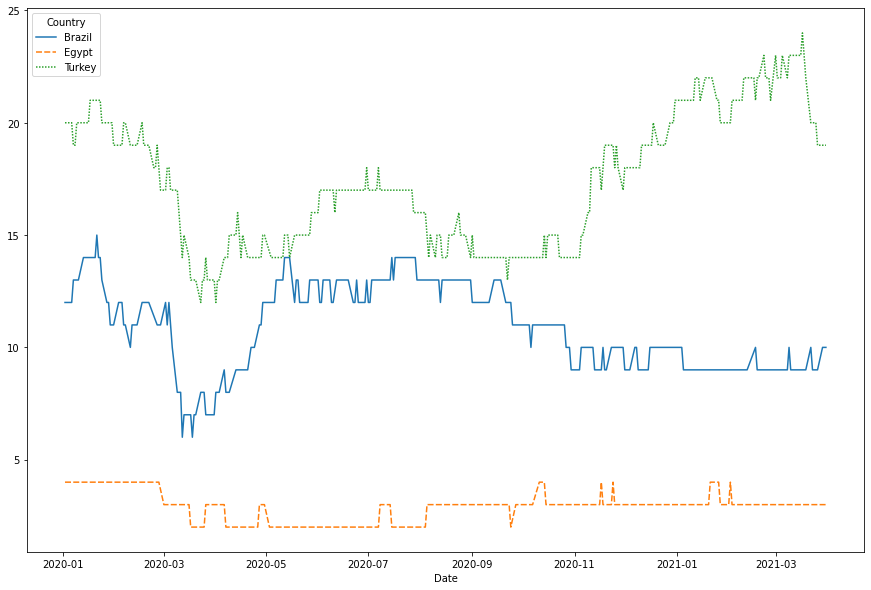

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = co[[ 'Brazil', 'Egypt', 'Turkey']]) # SouthAfrica','SouthKorea','Colombia','Russia','Argentina',

<Figure size 720x720 with 0 Axes>

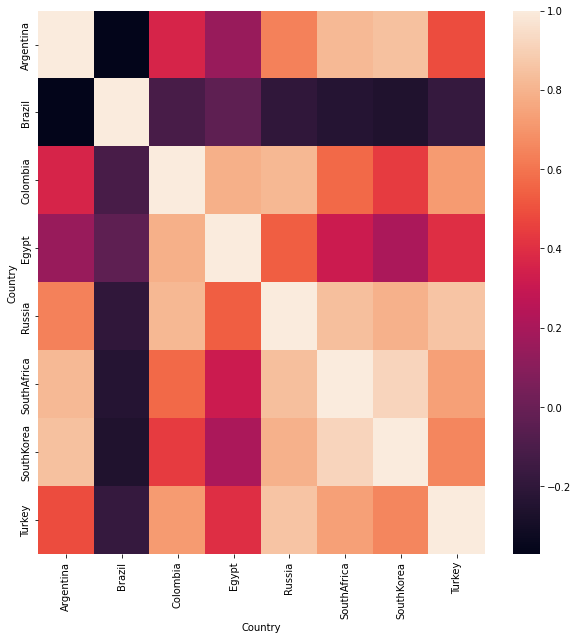

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(co.corr())

In [ ]:
cow = co.resample(rule ='W').mean()
cow.head(2)

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-05       48.0    12.0    7060.0    4.0  255.00      14586.5   
2020-01-12       47.4    12.8    6852.5    4.0  256.75      14871.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-05      5875.0    20.0  
2020-01-12      5568.0    19.6

<Figure size 1080x720 with 0 Axes>

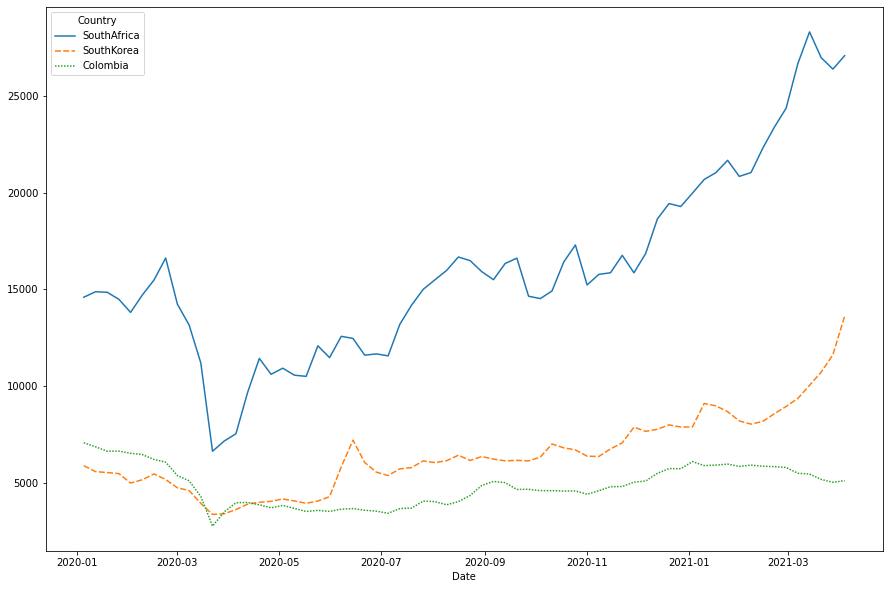

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = cow[['SouthAfrica','SouthKorea','Colombia']])

<Figure size 1080x720 with 0 Axes>

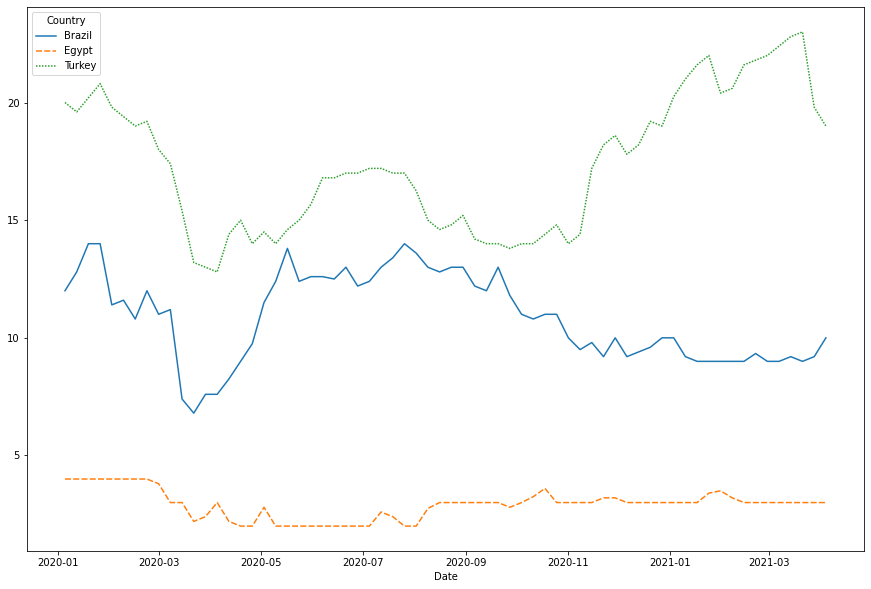

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = cow[[ 'Brazil', 'Egypt', 'Turkey']]) # SouthAfrica','SouthKorea','Colombia','Russia','Argentina',

<Figure size 1080x720 with 0 Axes>

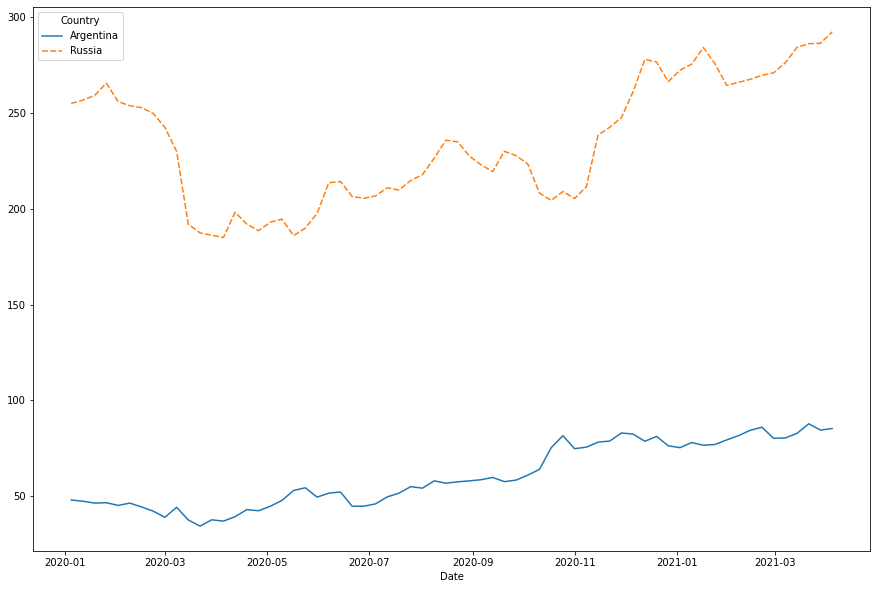

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = cow[['Argentina', 'Russia']]) # SouthAfrica','SouthKorea','Colombia'

In [ ]:
com = co.resample(rule ='M').mean()
com.head(2)

Country     Argentina     Brazil     Colombia  Egypt      Russia  \
Date                                                               
2020-01-31  46.545455  12.954545  6683.333333    4.0  259.300000   
2020-02-29  43.444444  11.388889  6017.000000    4.0  250.105263   

Country      SouthAfrica   SouthKorea     Turkey  
Date                                              
2020-01-31  14508.090909  5446.750000  20.090909  
2020-02-29  15255.450000  5120.952381  18.900000

<Figure size 1080x720 with 0 Axes>

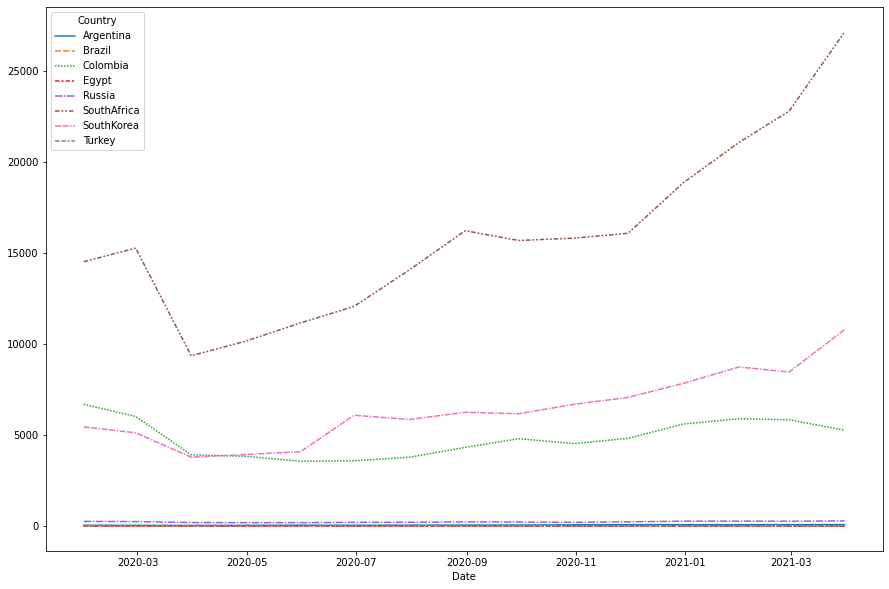

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=com)

<Figure size 1080x720 with 0 Axes>

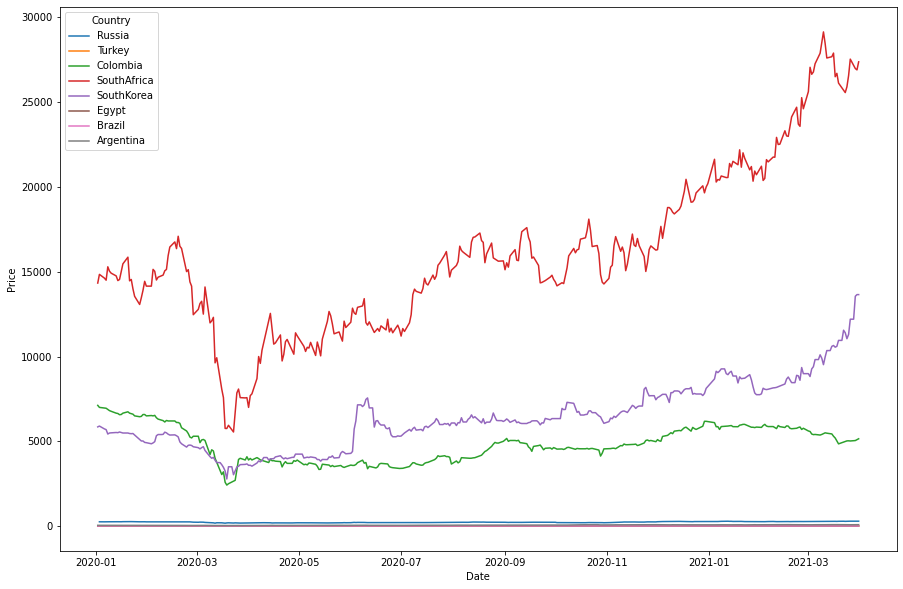

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df.reset_index(), x=df.reset_index()['Date'], y= 'Price', hue="Country")

<Figure size 1080x720 with 0 Axes>

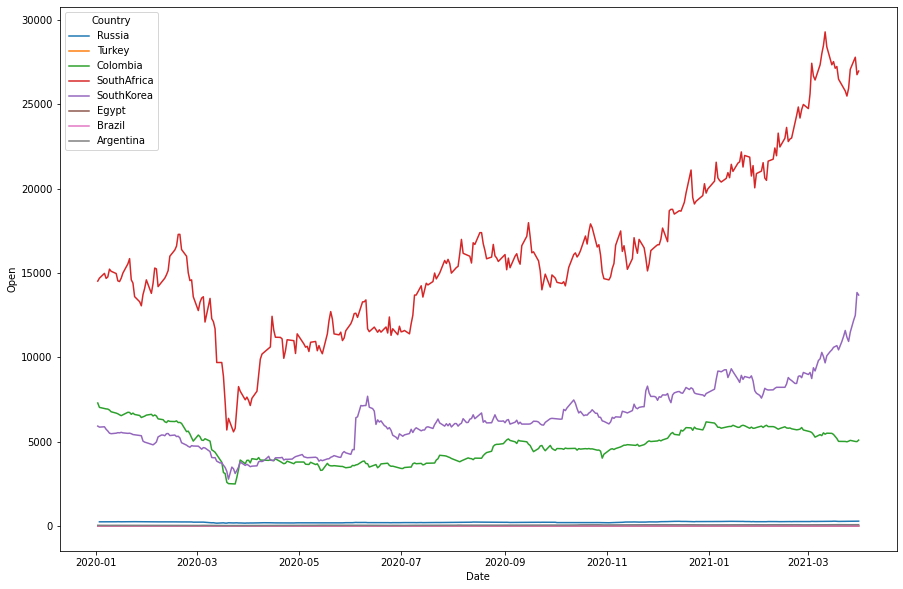

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df.reset_index(), x=df.reset_index()['Date'], y= 'Open', hue="Country")

<Figure size 1080x720 with 0 Axes>

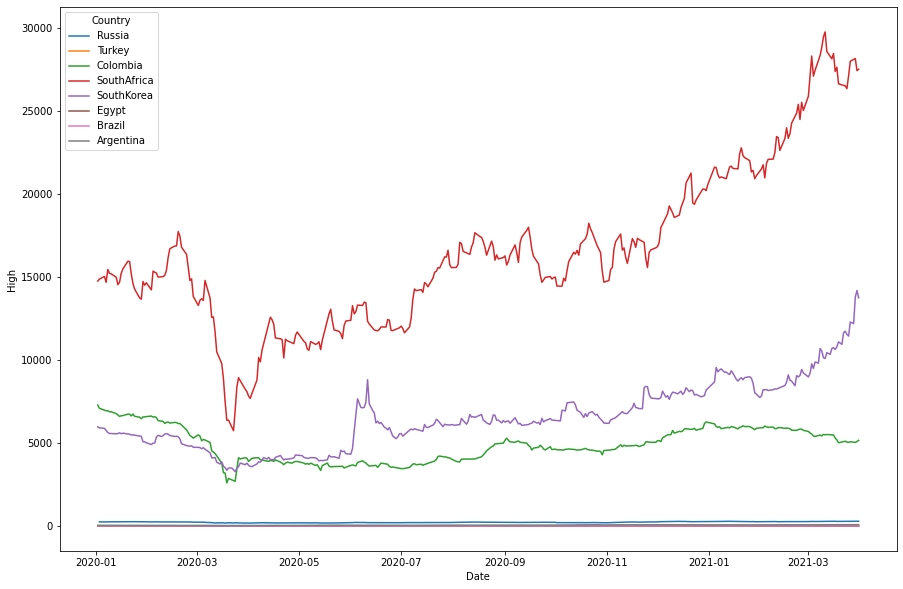

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df.reset_index(), x=df.reset_index()['Date'], y= 'High', hue="Country")

<Figure size 1080x720 with 0 Axes>

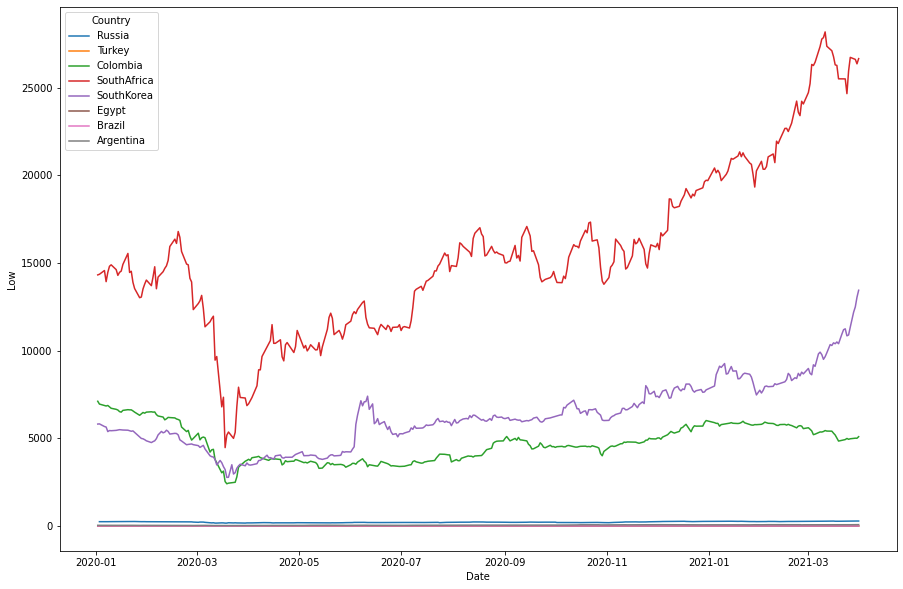

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df.reset_index(), x=df.reset_index()['Date'], y= 'Low', hue="Country")

In [ ]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'year', 'month',
       'day', 'hour', 'weekday', 'Country', 'shifted', 'change', 'return',
       'pct_return_3d'],
      dtype='object')

# Get retruns for stock price series

In [ ]:
#df['lagged']=df.Price.shift(periods = -1) # the lagged version (in past)
df['shifted']=df.Price.shift() # default 1
df.head(3)

Price  Open  High  Low    Vol.  Change %  year  month  day  hour  \
Date                                                                           
2021-03-31    291   294   294  290  47.00M   -0.0076  2021      3   31     0   
2021-03-30    293   294   295  291  38.81M   -0.0002  2021      3   30     0   
2021-03-29    293   289   294  289  43.68M    0.0071  2021      3   29     0   

            weekday Country  shifted  
Date                                  
2021-03-31        2  Russia      NaN  
2021-03-30        1  Russia    291.0  
2021-03-29        0  Russia    293.0

In [ ]:
# calculate one period percent change
df['change'] = df.Price.div(df.shifted)
df[['Price', 'shifted', 'change']].head()

Price  shifted    change
Date                                
2021-03-31    291      NaN       NaN
2021-03-30    293    291.0  1.006873
2021-03-29    293    293.0  1.000000
2021-03-26    291    293.0  0.993174
2021-03-25    286    291.0  0.982818

In [ ]:
# relative change in percentage return 
df['return']= df.change.sub(1).mul(100)
df[['Price', 'shifted', 'change', 'return']].head()

Price  shifted    change    return
Date                                          
2021-03-31    291      NaN       NaN       NaN
2021-03-30    293    291.0  1.006873  0.687285
2021-03-29    293    293.0  1.000000  0.000000
2021-03-26    291    293.0  0.993174 -0.682594
2021-03-25    286    291.0  0.982818 -1.718213

In [ ]:
# anaother to get the percentage change return (periode of 3)
df['pct_return_3d'] = df.Price.pct_change(periods= 3).mul(100)
df[['Price', 'shifted', 'change', 'return', 'pct_return_3d']].head()

Price  shifted    change    return  pct_return_3d
Date                                                         
2021-03-31    291      NaN       NaN       NaN            NaN
2021-03-30    293    291.0  1.006873  0.687285            NaN
2021-03-29    293    293.0  1.000000  0.000000            NaN
2021-03-26    291    293.0  0.993174 -0.682594       0.000000
2021-03-25    286    291.0  0.982818 -1.718213      -2.389078

In [ ]:
#Use .asfreq() to set the frequency of google to business daily.
#dftry = dftry.asfreq('B')

# Compare Return 

In [ ]:
re = df[['Price', 'Country']]
re.head(2)

Price Country
Date                     
2021-03-31    291  Russia
2021-03-30    293  Russia

In [ ]:
re = re.pivot(columns='Country', values= 'Price')
re.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02       48.0    12.0    7120.0    4.0     NaN      14330.0   
2020-01-03       48.0    12.0    7000.0    NaN   255.0      14843.0   
2020-01-05        NaN     NaN       NaN    4.0     NaN          NaN   
2020-01-06       48.0    12.0       NaN    4.0   253.0      14620.0   
2020-01-07       47.0    13.0    6950.0    NaN     NaN      14500.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-02      5850.0    20.0  
2020-01-03      5900.0    20.0  
2020-01-05         NaN     NaN  
2020-01-06      5730.0    20.0  
2020-01-07      5690.0    19.0

In [ ]:
re.isnull().sum()

Country
Argentina      0
Brazil         0
Colombia       0
Egypt          0
Russia         0
SouthAfrica    0
SouthKorea     0
Turkey         0
dtype: int64

In [ ]:
re.bfill(inplace=True)

In [ ]:
re.columns

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey'],
      dtype='object', name='Country')

In [ ]:
for col in re.columns:
  # Create daily_return
  re[col+'_d'] = re[col].pct_change(periods=1).mul(100)
    # Create weekly_return
  re[col+'_w'] = re[col].pct_change(periods=7).mul(100)
  # Create monthly_return
  re[col+'_m'] = re[col].pct_change(periods=30).mul(100)
  # Create annual_return
  re[col+'_a'] = re[col].pct_change(periods=360).mul(100)
re.head(2)

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02       48.0    12.0    7120.0    4.0   255.0      14330.0   
2020-01-03       48.0    12.0    7000.0    4.0   255.0      14843.0   

Country     SouthKorea  Turkey  Argentina_d  Argentina_w  Argentina_m  \
Date                                                                    
2020-01-02      5850.0    20.0          NaN          NaN          NaN   
2020-01-03      5900.0    20.0          0.0          NaN          NaN   

Country     Argentina_a  Brazil_d  Brazil_w  Brazil_m  Brazil_a  Colombia_d  \
Date                                                                          
2020-01-02          NaN       NaN       NaN       NaN       NaN         NaN   
2020-01-03          NaN       0.0       NaN       NaN       NaN   -1.685393   

Country     Colombia_w  Colombia_m  Colombia_a  Egypt_d  Egypt_w  Egypt_m  \
Date                                                                        
2020-01-02         NaN         NaN         NaN      NaN      NaN      NaN   
2020-01-03         NaN         NaN         NaN      0.0      NaN      NaN   

Country     Egypt_a  Russia_d  Russia_w  Russia_m  Russia_a  SouthAfrica_d  \
Date                                                                         
2020-01-02      NaN       NaN       NaN       NaN       NaN            NaN   
2020-01-03      NaN       0.0       NaN       NaN       NaN       3.579902   

Country     SouthAfrica_w  SouthAfrica_m  SouthAfrica_a  SouthKorea_d  \
Date                                                                    
2020-01-02            NaN            NaN            NaN           NaN   
2020-01-03            NaN            NaN            NaN      0.854701   

Country     SouthKorea_w  SouthKorea_m  SouthKorea_a  Turkey_d  Turkey_w  \
Date                                                                       
2020-01-02           NaN           NaN           NaN       NaN       NaN   
2020-01-03           NaN           NaN           NaN       0.0       NaN   

Country     Turkey_m  Turkey_a  
Date                            
2020-01-02       NaN       NaN  
2020-01-03       NaN       NaN

In [ ]:
re.columns

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey', 'Argentina_d', 'Argentina_w', 'Argentina_m',
       'Argentina_a', 'Brazil_d', 'Brazil_w', 'Brazil_m', 'Brazil_a',
       'Colombia_d', 'Colombia_w', 'Colombia_m', 'Colombia_a', 'Egypt_d',
       'Egypt_w', 'Egypt_m', 'Egypt_a', 'Russia_d', 'Russia_w', 'Russia_m',
       'Russia_a', 'SouthAfrica_d', 'SouthAfrica_w', 'SouthAfrica_m',
       'SouthAfrica_a', 'SouthKorea_d', 'SouthKorea_w', 'SouthKorea_m',
       'SouthKorea_a', 'Turkey_d', 'Turkey_w', 'Turkey_m', 'Turkey_a'],
      dtype='object', name='Country')

<Figure size 1080x720 with 0 Axes>

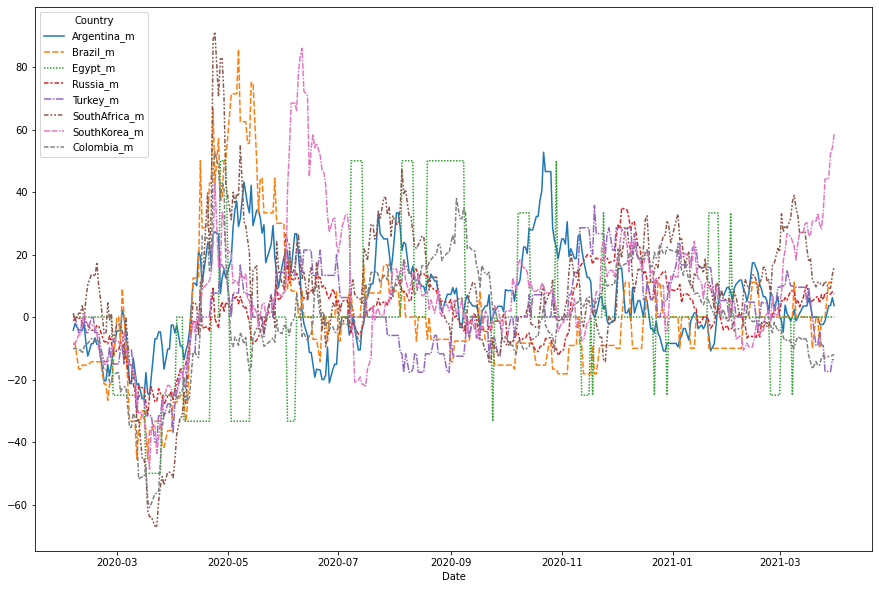

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_m', 'Brazil_m', 'Egypt_m', 'Russia_m', 'Turkey_m', 'SouthAfrica_m','SouthKorea_m','Colombia_m']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

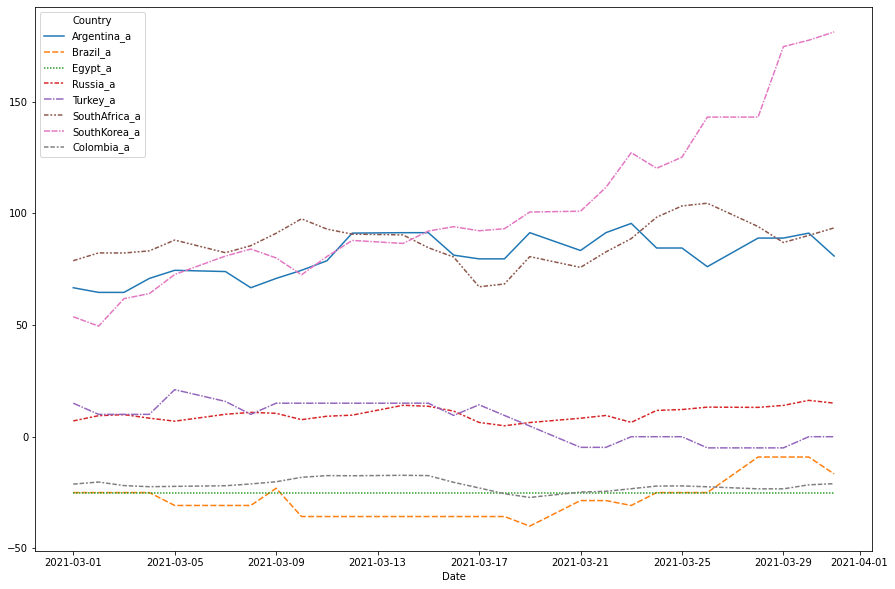

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_a', 'Brazil_a', 'Egypt_a', 'Russia_a', 'Turkey_a', 'SouthAfrica_a','SouthKorea_a','Colombia_a']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

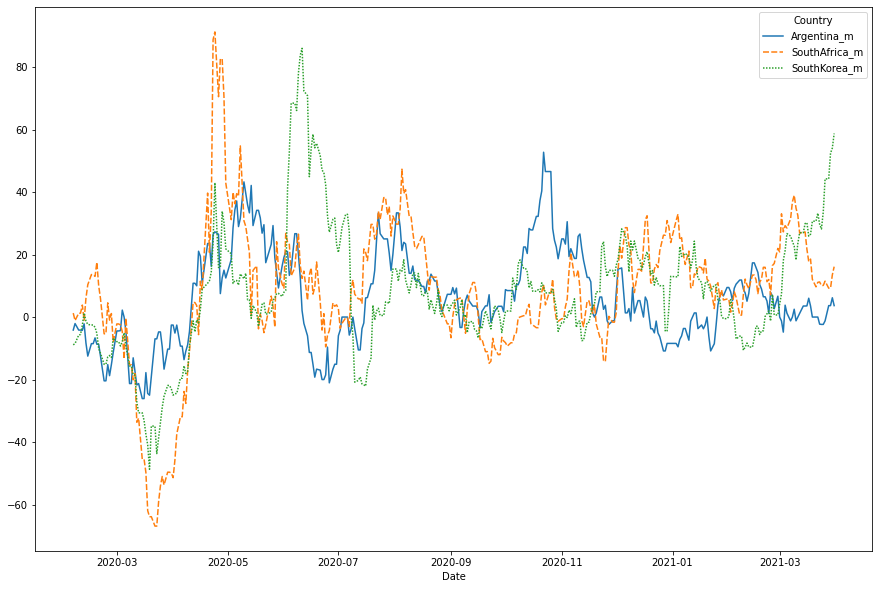

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_m', 'SouthAfrica_m','SouthKorea_m']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

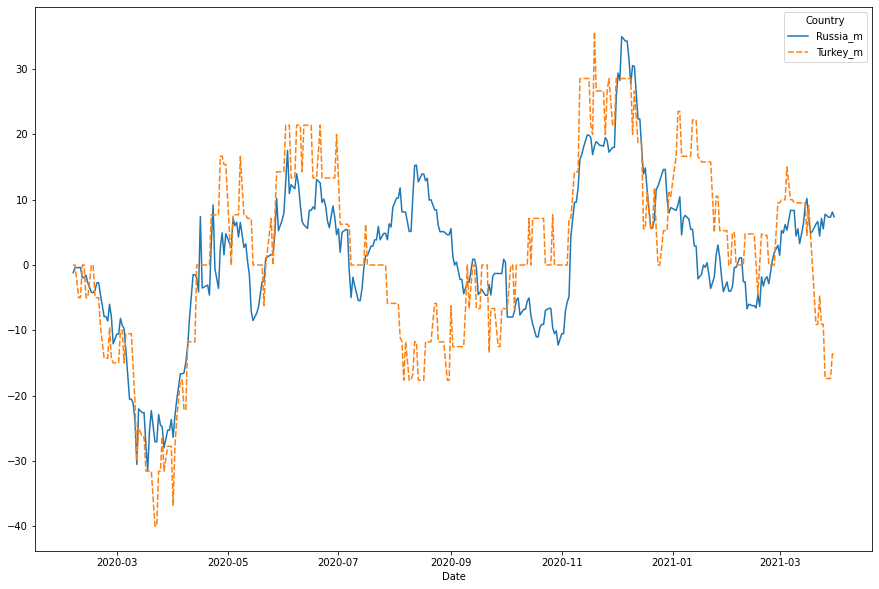

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Russia_m', 'Turkey_m']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

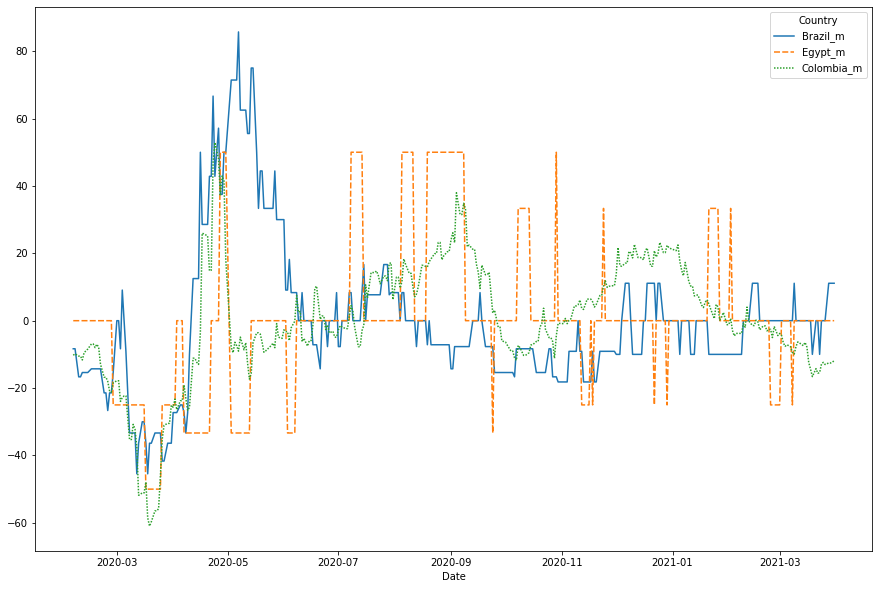

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Brazil_m', 'Egypt_m' ,'Colombia_m']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

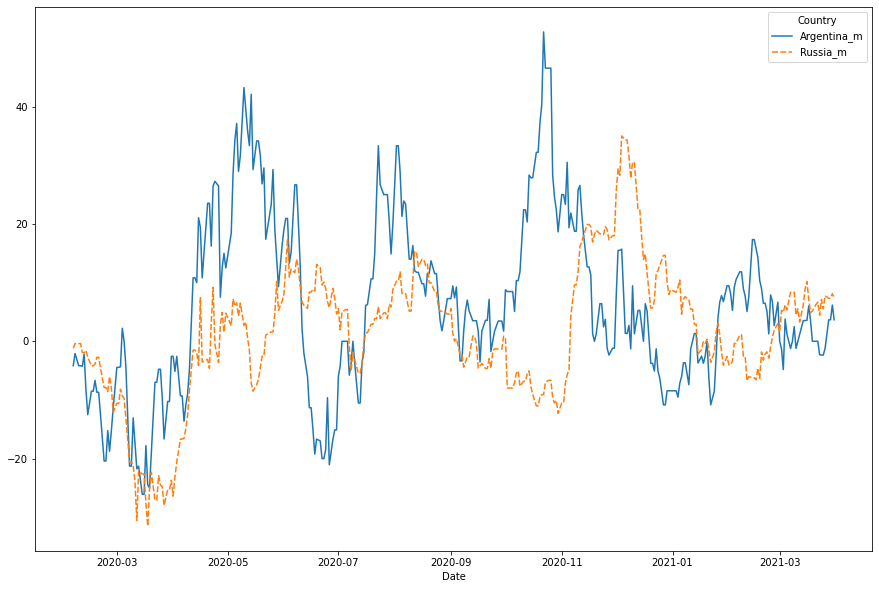

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_m', 'Russia_m']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

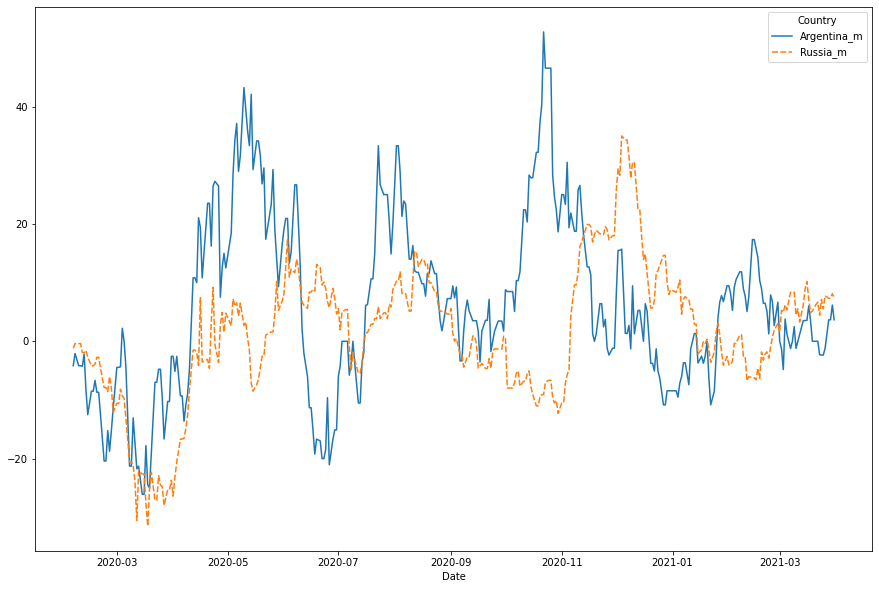

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_m', 'Russia_m']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

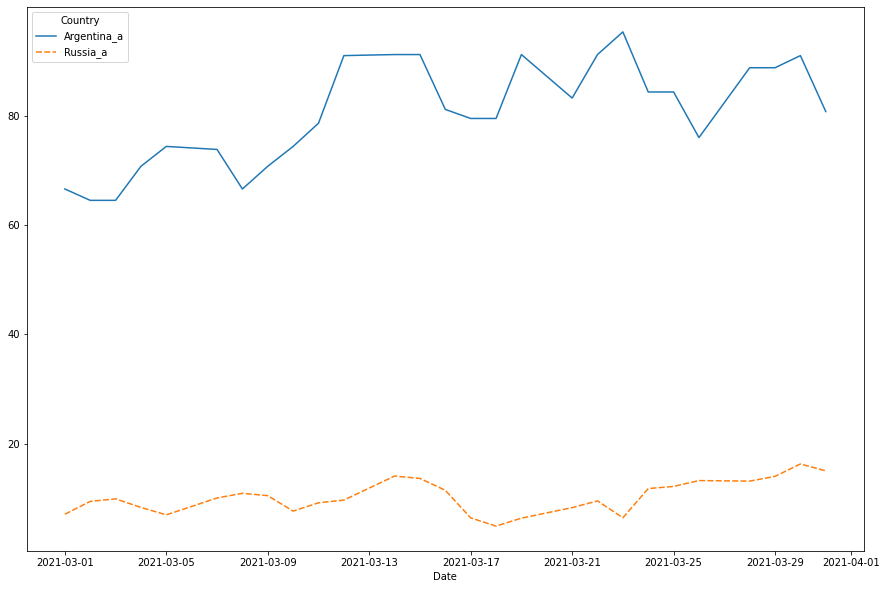

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['Argentina_a', 'Russia_a']]) # SouthAfrica','SouthKorea','Colombia'

<Figure size 1080x720 with 0 Axes>

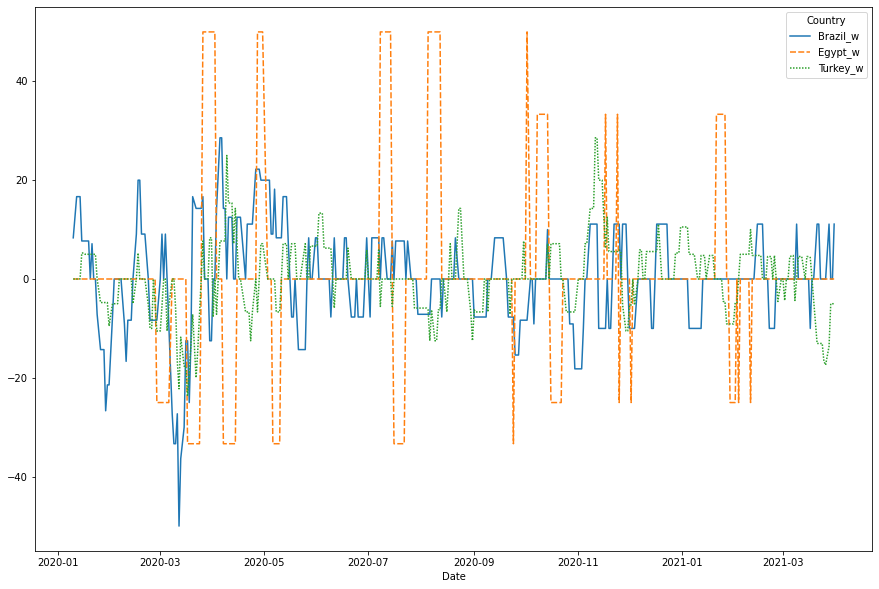

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[[ 'Brazil_w', 'Egypt_w', 'Turkey_w']]) # SouthAfrica','SouthKorea','Colombia','Russia','Argentina',

<Figure size 1080x720 with 0 Axes>

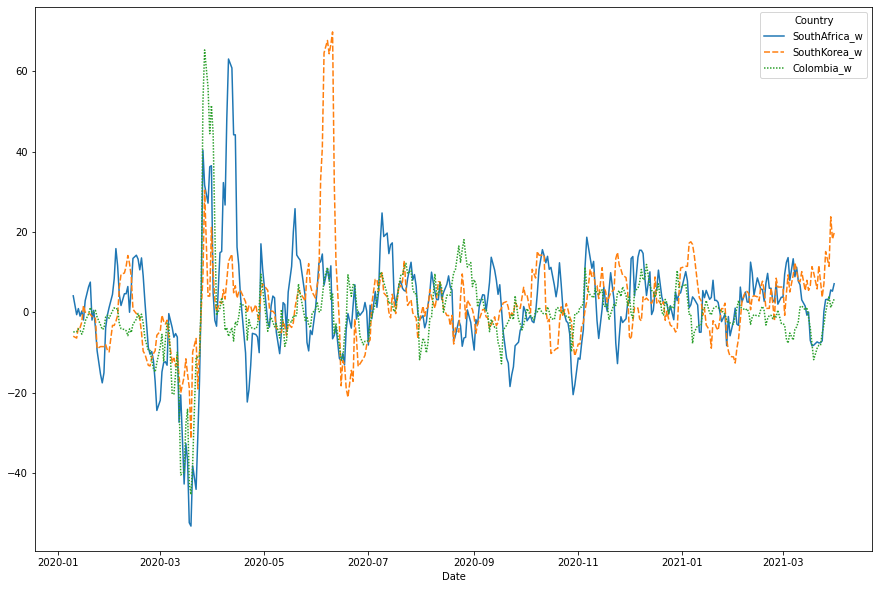

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = re[['SouthAfrica_w','SouthKorea_w','Colombia_w']])

<Figure size 1080x720 with 0 Axes>

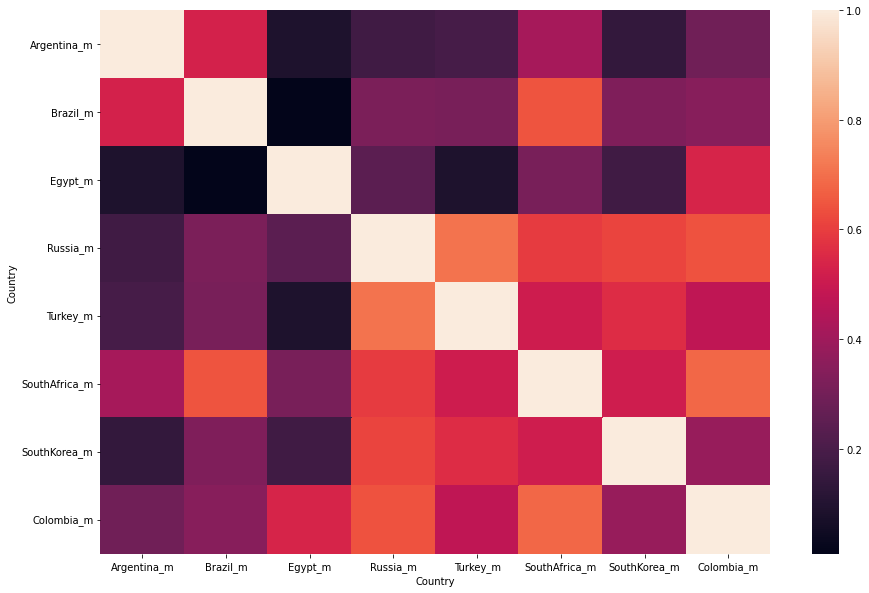

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data = re[['Argentina_m', 'Brazil_m', 'Egypt_m', 'Russia_m', 'Turkey_m', 'SouthAfrica_m','SouthKorea_m','Colombia_m']].corr())

<Figure size 1080x720 with 0 Axes>

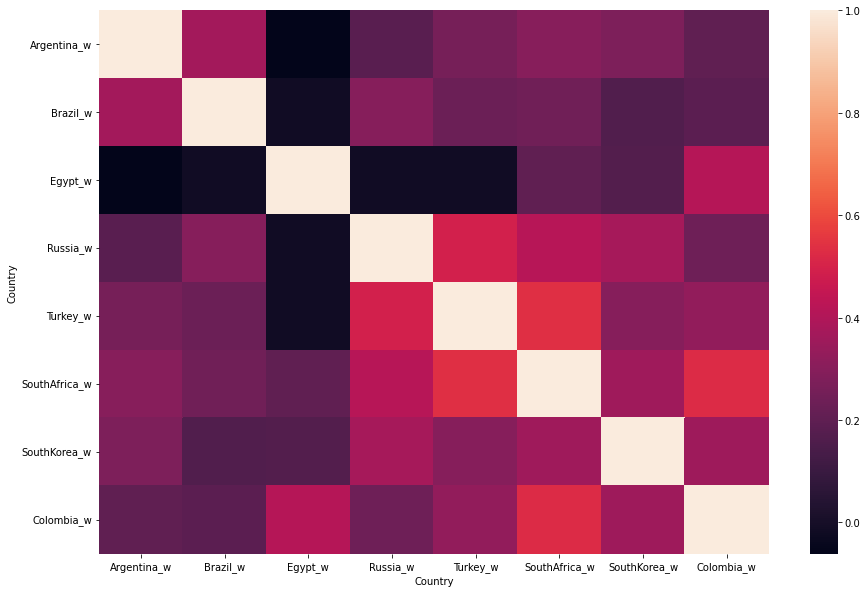

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data = re[['Argentina_w', 'Brazil_w', 'Egypt_w', 'Russia_w', 'Turkey_w', 'SouthAfrica_w','SouthKorea_w','Colombia_w']].corr())

# EDA Price Open High Low

In [ ]:
# convert daily data to weekly data 
#df.resample(rule="W").last()

In [ ]:
df.head(2)

Price  Open  High  Low    Vol.  Change %  year  month  day  hour  \
Date                                                                           
2021-03-31    291   294   294  290  47.00M   -0.0076  2021      3   31     0   
2021-03-30    293   294   295  291  38.81M   -0.0002  2021      3   30     0   

            weekday Country  
Date                         
2021-03-31        2  Russia  
2021-03-30        1  Russia

In [ ]:
df2 = df[['Price', 'Country','Open', 'High', 'Low', 'Vol.']]
df2.head(2)

Price Country  Open  High  Low    Vol.
Date                                              
2021-03-31    291  Russia   294   294  290  47.00M
2021-03-30    293  Russia   294   295  291  38.81M

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e2177ed00>,
      dtype=object)

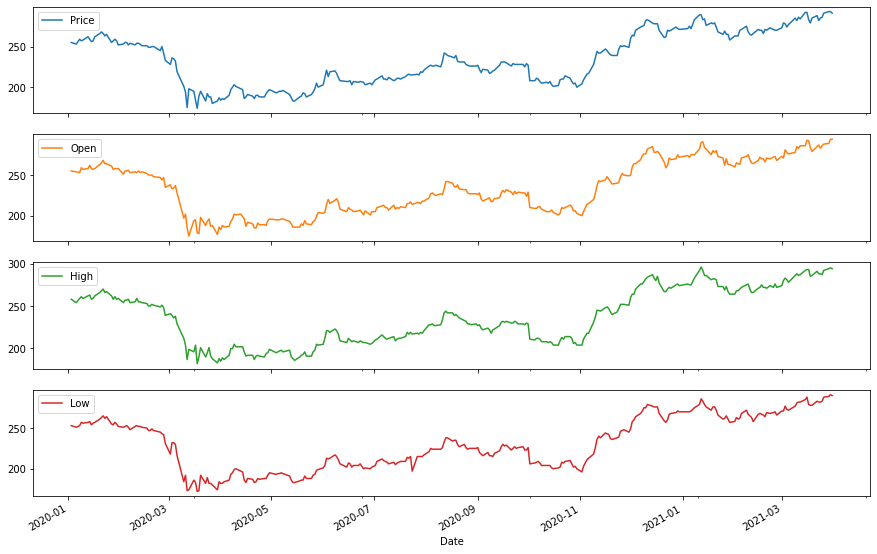

In [ ]:
df2[df2['Country']=='Russia'].plot(subplots = True, figsize =(15, 10))

In [ ]:
df2.Country.unique()

array(['Russia', 'Turkey', 'Colombia', 'SouthAfrica', 'SouthKorea',
       'Egypt', 'Brazil', 'Argentina'], dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f759b8d6fa0>,
      dtype=object)

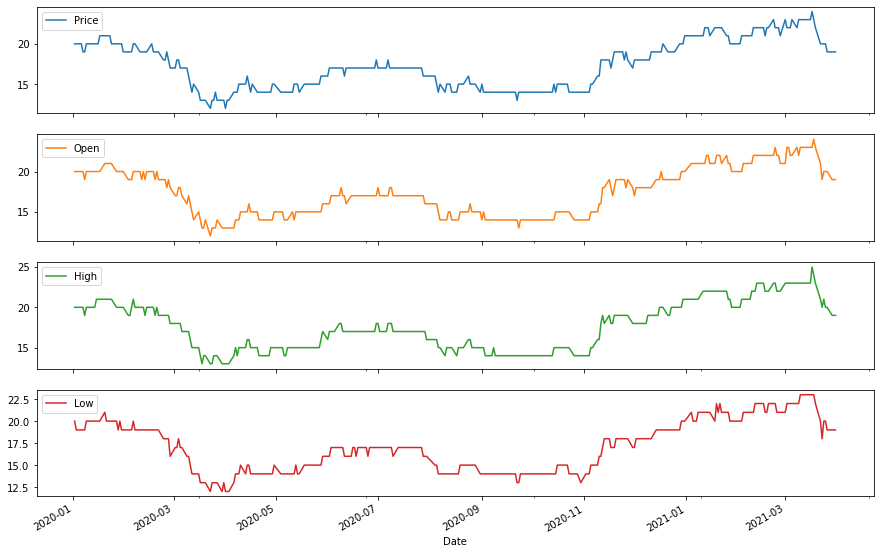

In [ ]:
df2[df2['Country']=='Turkey'].plot(subplots = True, figsize =(15, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f759b61b370>,
      dtype=object)

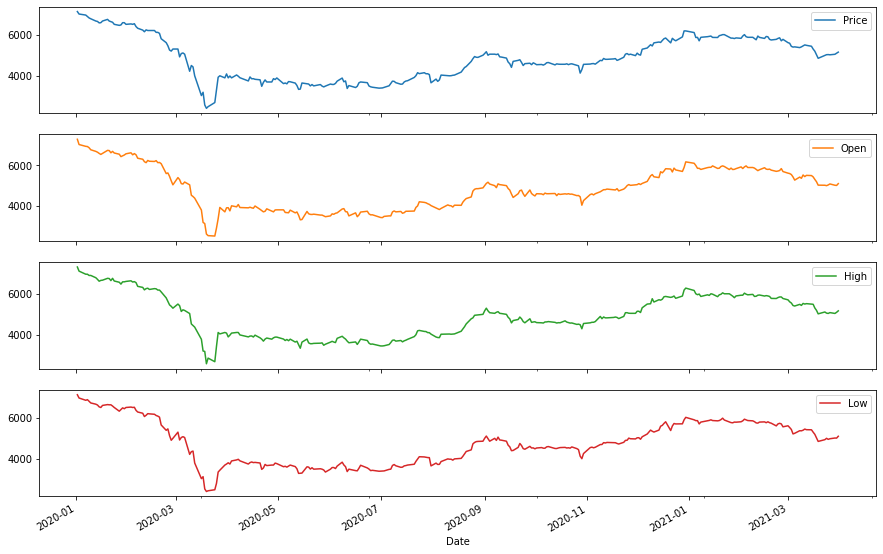

In [ ]:
df2[df2['Country']=='Colombia'].plot(subplots = True, figsize =(15, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f759b49f670>,
      dtype=object)

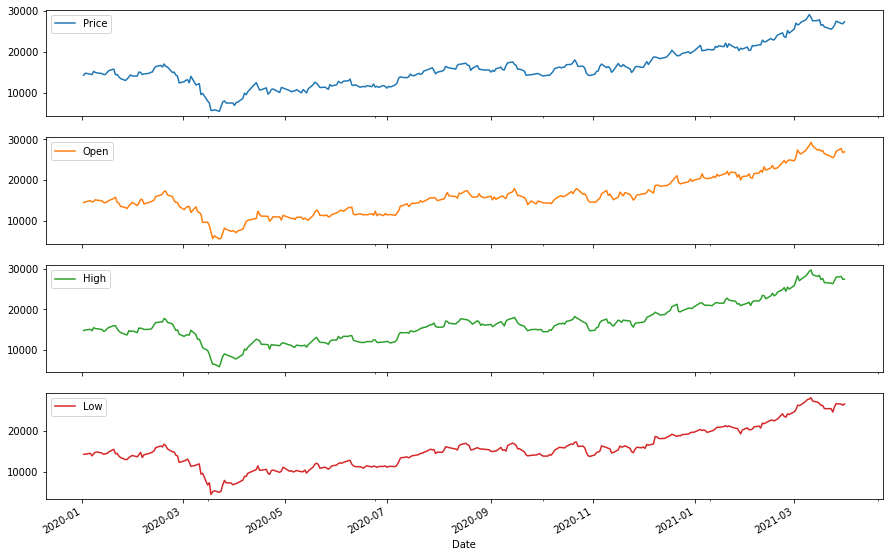

In [ ]:
df2[df2['Country']=='SouthAfrica'].plot(subplots = True, figsize =(15, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f759b33c610>,
      dtype=object)

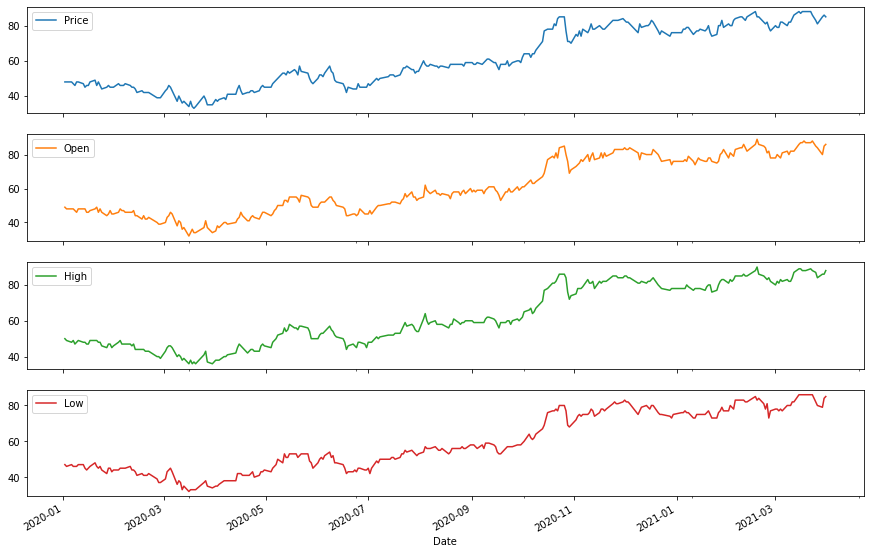

In [ ]:
df2[df2['Country']=='Argentina'].plot(subplots = True, figsize =(15, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f759b19eca0>,
      dtype=object)

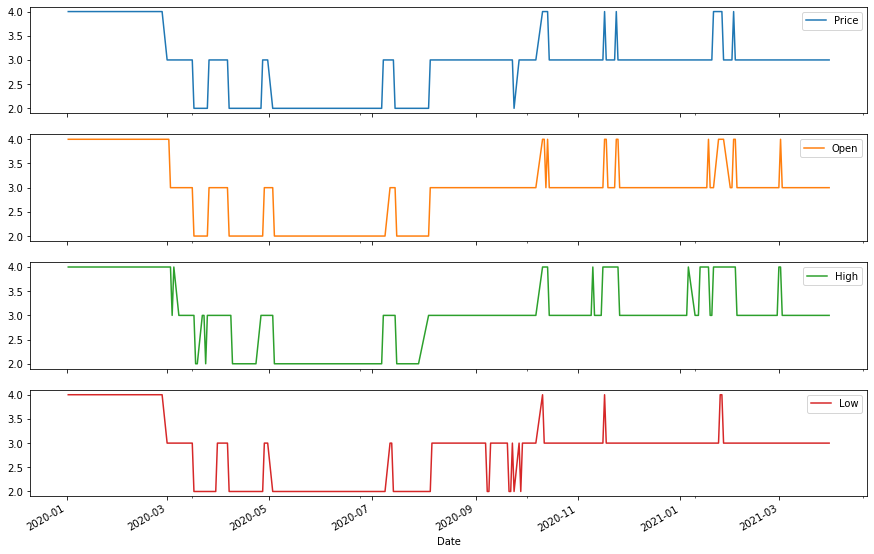

In [ ]:
df2[df2['Country']=='Egypt'].plot(subplots = True, figsize =(15, 10))

# autocorrelation

In [ ]:
re.head(2)

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02       48.0    12.0    7120.0    4.0   255.0      14330.0   
2020-01-03       48.0    12.0    7000.0    4.0   255.0      14843.0   

Country     SouthKorea  Turkey  Argentina_d  Argentina_w  Argentina_m  \
Date                                                                    
2020-01-02      5850.0    20.0          NaN          NaN          NaN   
2020-01-03      5900.0    20.0          0.0          NaN          NaN   

Country     Argentina_a  Brazil_d  Brazil_w  Brazil_m  Brazil_a  Colombia_d  \
Date                                                                          
2020-01-02          NaN       NaN       NaN       NaN       NaN         NaN   
2020-01-03          NaN       0.0       NaN       NaN       NaN   -1.685393   

Country     Colombia_w  Colombia_m  Colombia_a  Egypt_d  Egypt_w  Egypt_m  \
Date                                                                        
2020-01-02         NaN         NaN         NaN      NaN      NaN      NaN   
2020-01-03         NaN         NaN         NaN      0.0      NaN      NaN   

Country     Egypt_a  Russia_d  Russia_w  Russia_m  Russia_a  SouthAfrica_d  \
Date                                                                         
2020-01-02      NaN       NaN       NaN       NaN       NaN            NaN   
2020-01-03      NaN       0.0       NaN       NaN       NaN       3.579902   

Country     SouthAfrica_w  SouthAfrica_m  SouthAfrica_a  SouthKorea_d  \
Date                                                                    
2020-01-02            NaN            NaN            NaN           NaN   
2020-01-03            NaN            NaN            NaN      0.854701   

Country     SouthKorea_w  SouthKorea_m  SouthKorea_a  Turkey_d  Turkey_w  \
Date                                                                       
2020-01-02           NaN           NaN           NaN       NaN       NaN   
2020-01-03           NaN           NaN           NaN       0.0       NaN   

Country     Turkey_m  Turkey_a  
Date                            
2020-01-02       NaN       NaN  
2020-01-03       NaN       NaN

In [ ]:
re.columns

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey', 'Argentina_d', 'Argentina_w', 'Argentina_m',
       'Argentina_a', 'Brazil_d', 'Brazil_w', 'Brazil_m', 'Brazil_a',
       'Colombia_d', 'Colombia_w', 'Colombia_m', 'Colombia_a', 'Egypt_d',
       'Egypt_w', 'Egypt_m', 'Egypt_a', 'Russia_d', 'Russia_w', 'Russia_m',
       'Russia_a', 'SouthAfrica_d', 'SouthAfrica_w', 'SouthAfrica_m',
       'SouthAfrica_a', 'SouthKorea_d', 'SouthKorea_w', 'SouthKorea_m',
       'SouthKorea_a', 'Turkey_d', 'Turkey_w', 'Turkey_m', 'Turkey_a'],
      dtype='object', name='Country')

In [ ]:
re.isna().sum()

Country
Argentina         0
Brazil            0
Colombia          0
Egypt             0
Russia            0
               ... 
SouthKorea_a    360
Turkey_d          1
Turkey_w          7
Turkey_m         30
Turkey_a        360
Length: 40, dtype: int64

In [ ]:
autocorrelation = {}
for col in re.columns:
  # Compute and print the autocorrelation of returns
  autocorrelation[col] = re[col].autocorr()
#pd.DataFrame(autocorrelation)

In [ ]:
autocorrelation

{'Argentina': 0.9938685612749766,
 'Brazil': 0.9683032855338295,
 'Colombia': 0.9919119708602889,
 'Egypt': 0.9335792580537693,
 'Russia': 0.9911619991802201,
 'SouthAfrica': 0.992431205528144,
 'SouthKorea': 0.9934686477173038,
 'Turkey': 0.9829860934432915,
 'Argentina_d': -0.020729812829577116,
 'Argentina_w': 0.8153868110032009,
 'Argentina_m': 0.9431249451001718,
 'Argentina_a': 0.7398491576418873,
 'Brazil_d': -0.13750546948266237,
 'Brazil_w': 0.7941602863212159,
 'Brazil_m': 0.947143361491591,
 'Brazil_a': 0.8006877557888084,
 'Colombia_d': 0.1463538024492281,
 'Colombia_w': 0.8767342632583115,
 'Colombia_m': 0.9650169991484363,
 'Colombia_a': 0.8555498458398889,
 'Egypt_d': -0.15337917200057982,
 'Egypt_w': 0.762972030821896,
 'Egypt_m': 0.8385935064366654,
 'Egypt_a': nan,
 'Russia_d': -0.025990087757645015,
 'Russia_w': 0.8305127087736375,
 'Russia_m': 0.9707210620664808,
 'Russia_a': 0.6917346394189093,
 'SouthAfrica_d': 0.0011824584042036917,
 'SouthAfrica_w': 0.8653974559

<Figure size 1080x720 with 0 Axes>

<BarContainer object of 40 artists>

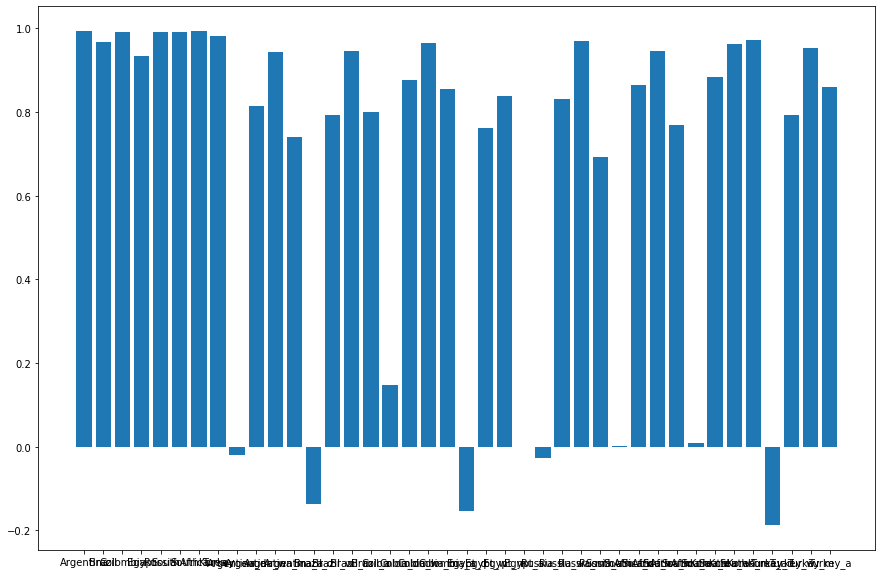

In [ ]:
names = list(autocorrelation.keys())
values = list(autocorrelation.values())
plt.figure(figsize=(15, 10))
plt.bar(range(len(autocorrelation)), values, tick_label=names)
plt.show()

In [ ]:
re['Argentina'].autocorr()

0.9938685612749766

# Are Interest Rates Autocorrelated?

In [ ]:
df2 = df[['Price', 'Country', 'Open', 'High', 'Low', 'Vol.']]

In [ ]:
df2['Price_return'] = df2['Price'].pct_change().mul(100)# return 
# Compute the daily change in interest rates 
df2['price_diff'] = df2['Price'].diff()
df2.head()

Price Country  Open  High  Low    Vol.  Price_return  price_diff
Date                                                                        
2021-03-31    291  Russia   294   294  290  47.00M           NaN         NaN
2021-03-30    293  Russia   294   295  291  38.81M      0.687285         2.0
2021-03-29    293  Russia   289   294  289  43.68M      0.000000         0.0
2021-03-26    291  Russia   288   292  288  56.07M     -0.682594        -2.0
2021-03-25    286  Russia   286   287  283  35.22M     -1.718213        -5.0

In [ ]:
#df2['shifted']=df2.Price.shift() # default 1
#df2['change'] = df2.Price.div(df2.shifted)
#df2['return']= df2.change.sub(1).mul(100)

In [ ]:
Interest = df[['Price', 'Country']]
Interest = Interest.pivot(columns='Country', values= 'Price')
Interest.bfill(inplace=True)
Interest.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02       48.0    12.0    7120.0    4.0   255.0      14330.0   
2020-01-03       48.0    12.0    7000.0    4.0   255.0      14843.0   
2020-01-05       48.0    12.0    6950.0    4.0   253.0      14620.0   
2020-01-06       48.0    12.0    6950.0    4.0   253.0      14620.0   
2020-01-07       47.0    13.0    6950.0    4.0   259.0      14500.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-02      5850.0    20.0  
2020-01-03      5900.0    20.0  
2020-01-05      5730.0    20.0  
2020-01-06      5730.0    20.0  
2020-01-07      5690.0    19.0

In [ ]:
for col in Interest.columns:
  # Compute the daily change in interest rates 
  Interest[col+'_int'] = Interest[col].diff()

In [ ]:
Interest.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02       48.0    12.0    7120.0    4.0   255.0      14330.0   
2020-01-03       48.0    12.0    7000.0    4.0   255.0      14843.0   
2020-01-05       48.0    12.0    6950.0    4.0   253.0      14620.0   
2020-01-06       48.0    12.0    6950.0    4.0   253.0      14620.0   
2020-01-07       47.0    13.0    6950.0    4.0   259.0      14500.0   

Country     SouthKorea  Turkey  Argentina_int  Brazil_int  Colombia_int  \
Date                                                                      
2020-01-02      5850.0    20.0            NaN         NaN           NaN   
2020-01-03      5900.0    20.0            0.0         0.0        -120.0   
2020-01-05      5730.0    20.0            0.0         0.0         -50.0   
2020-01-06      5730.0    20.0            0.0         0.0           0.0   
2020-01-07      5690.0    19.0           -1.0         1.0           0.0   

Country     Egypt_int  Russia_int  SouthAfrica_int  SouthKorea_int  Turkey_int  
Date                                                                            
2020-01-02        NaN         NaN              NaN             NaN         NaN  
2020-01-03        0.0         0.0            513.0            50.0         0.0  
2020-01-05        0.0        -2.0           -223.0          -170.0         0.0  
2020-01-06        0.0         0.0              0.0             0.0         0.0  
2020-01-07        0.0         6.0           -120.0           -40.0        -1.0

In [ ]:
Interest.columns

Index(['Argentina', 'Brazil', 'Colombia', 'Egypt', 'Russia', 'SouthAfrica',
       'SouthKorea', 'Turkey', 'Argentina_int', 'Brazil_int', 'Colombia_int',
       'Egypt_int', 'Russia_int', 'SouthAfrica_int', 'SouthKorea_int',
       'Turkey_int'],
      dtype='object', name='Country')

In [ ]:
autocor_int = {}
for col in Interest.columns:
  # Compute and print the autocorrelation of returns
  autocor_int[col] = Interest[col].autocorr()

In [ ]:
autocor_int

{'Argentina': 0.9938685612749766,
 'Brazil': 0.9683032855338295,
 'Colombia': 0.9919119708602889,
 'Egypt': 0.9335792580537693,
 'Russia': 0.9911619991802201,
 'SouthAfrica': 0.992431205528144,
 'SouthKorea': 0.9934686477173038,
 'Turkey': 0.9829860934432915,
 'Argentina_int': -0.013911806105248026,
 'Brazil_int': -0.1137678592513878,
 'Colombia_int': 0.11018104681820867,
 'Egypt_int': -0.1906234537357744,
 'Russia_int': 0.01459263742722746,
 'SouthAfrica_int': -0.050157412493112764,
 'SouthKorea_int': 0.024317454318217788,
 'Turkey_int': -0.15931868333946303}

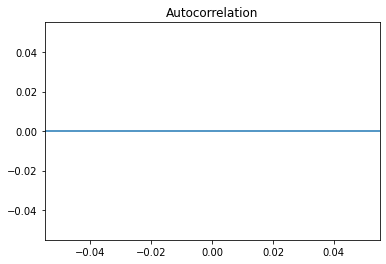

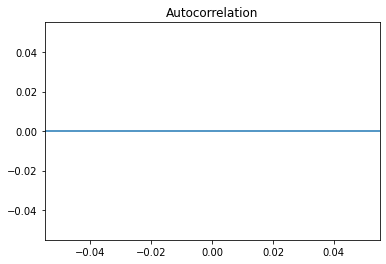

In [ ]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Plot the acf function
plot_acf(Interest.Argentina_int, alpha=1)
plt.show()

# time serie eval 

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df4 = df[['Price', 'Country']]
df4= df4.pivot(columns='Country', values= 'Price')
df4.bfill(inplace=True)
df4.head()

Country     Argentina  Brazil  Colombia  Egypt  Russia  SouthAfrica  \
Date                                                                  
2020-01-02       48.0    12.0    7120.0    4.0   255.0      14330.0   
2020-01-03       48.0    12.0    7000.0    4.0   255.0      14843.0   
2020-01-05       48.0    12.0    6950.0    4.0   253.0      14620.0   
2020-01-06       48.0    12.0    6950.0    4.0   253.0      14620.0   
2020-01-07       47.0    13.0    6950.0    4.0   259.0      14500.0   

Country     SouthKorea  Turkey  
Date                            
2020-01-02      5850.0    20.0  
2020-01-03      5900.0    20.0  
2020-01-05      5730.0    20.0  
2020-01-06      5730.0    20.0  
2020-01-07      5690.0    19.0

In [ ]:
cb = df4[['Colombia']].rename(columns={'Colombia':'price'}, index=None)
cb.head()

Country      price
Date              
2020-01-02  7120.0
2020-01-03  7000.0
2020-01-05  6950.0
2020-01-06  6950.0
2020-01-07  6950.0

In [ ]:
Colombia_w= seasonal_decompose(cb['price'].resample('W').mean().dropna()).plot()
#Colombia_M= seasonal_decompose(cb['price'].resample('M').mean().dropna(),period = 52).plot()
plt.show()

ValueError: ignored

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('seaborn-colorblind')

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

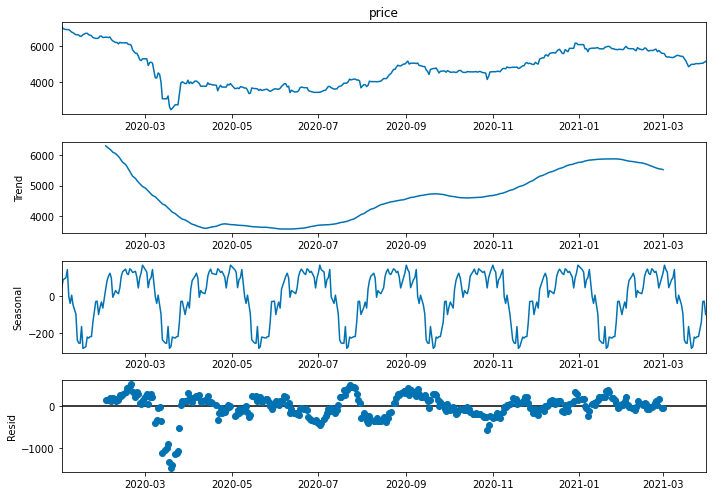

In [ ]:
plt.figure(figsize=(20, 10))
dec = seasonal_decompose(cb['price'], period = 52).plot()
plt.show()

# Stationarity of time serie

## Augmented Dickey-Fuller Test
Augmented Dickey-Fuller Test is a common statistical test used to test whether a given Time series is stationary or not. We can achieve this by defining the null and alternate hypothesis.

Null Hypothesis: Time Series is no stationary. It gives a time-dependent trend.

Alternate Hypothesis: Time Series is stationary. In another term, the series doesn’t depend on time.

ADF or t Statistic < critical values: Accept the alternative hypothesis. Time series is stationary.

ADF or t Statistic > critical values: Failed to reject the null hypothesis. The time series is non-stationary

if p-value is not less than .05 (depend on the alpha), we fail to reject the null hypothesis. This means the time series is non-stationary.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [ ]:
def check_stationarity_ADF(serie):
    result = adfuller(serie)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] < result[4]["5%"]:
        print ("Reject Ho - and the Time Series is Stationary")
    else:
         print ("Failed to Reject Ho -and the Time Series is Non-Stationary")

In [ ]:
def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

## KPSS Test

Unlike KPSS test, the null hypothesis is the series is stationary. Based upon the significance level of 0.05 and the p-value of KPSS test, if if P < 0.05 , there is evidence for rejecting the null hypothesis in favor of the alternative. Hence, the series is non-stationary as per the KPSS test. otherwise, the serie is stationary.

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Here, due to the difference in the results from ADF test and KPSS test, it can be inferred that the series is trend stationary and not strict stationary. The series can be detrended by differencing or by model fitting

In [ ]:
def kpss_test(series, sig=0.05, name=''):
    statistic, p_value, n_lags, critical_values = kpss(series, nlags='auto')    
    p_value = round(p_value, 3) 
    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Non Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => stationary.")

In [ ]:
adfuller_test(cb.price, sig=0.05, name='Colombia_price')

 Colombia_price : P-Value = 0.173 => Non-stationary.


In [ ]:
kpss_test(cb.price, sig=0.05, name='Colombia_price')

 Colombia_price : P-Value = 0.012 => Non Stationary. 


In [ ]:
adfuller_test(cb['price'].diff().dropna(), sig=0.05, name='Colombia_price')

 Colombia_price : P-Value = 0.0 => Stationary. 


In [ ]:
kpss_test(cb.price.diff().diff().dropna(), sig=0.05, name='Colombia_price')

 Colombia_price : P-Value = 0.1 => stationary.


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [ ]:

def plot_correlations(serie):
    fig, ax = plt.subplots(figsize=(8, 5))
    _ = plot_acf(serie, ax=ax)
    fig, ax = plt.subplots(figsize=(8, 5))
    _ = plot_pacf(serie, ax=ax)

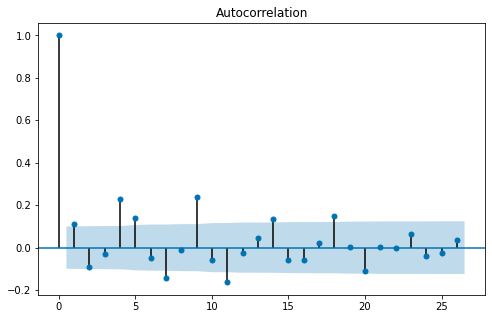

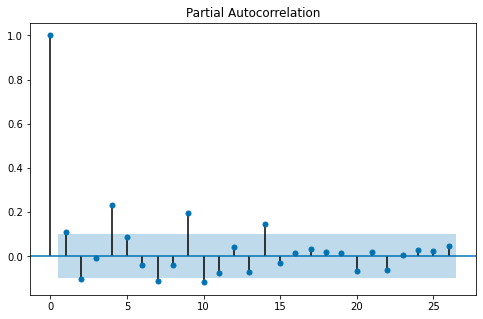

In [ ]:
plot_correlations(cb.price.diff().dropna())

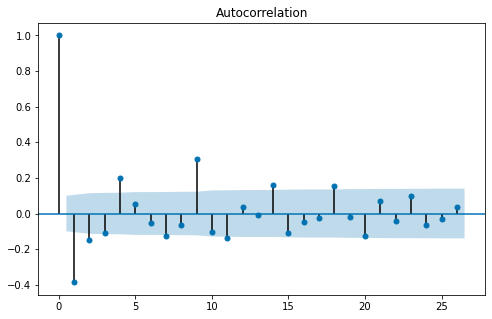

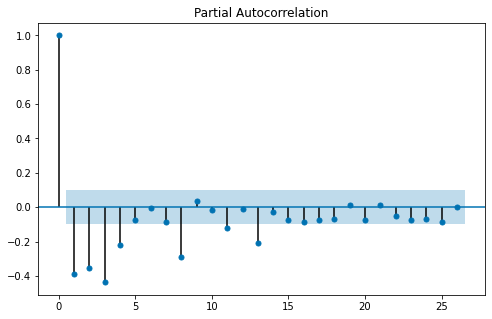

In [ ]:
plot_correlations(cb.price.diff().diff().dropna())

In [ ]:
# Split the data into a train and test set
def train_test(df):
    train = df.loc[:'2020']
    test = df.loc['2021':]
    return train, test 

In [ ]:
def plot_price_vol(train, test, col): # df is train or test
    # Create an axis
    fig, ax = plt.subplots(figsize=(15,8))

    # Plot the train and test sets on the axis ax
    train[[col]].plot(ax=ax)
    test[[col]].plot(ax=ax)
    ax.set_title( col + ' ' + 'train and test set', fontsize=20)
    plt.show()

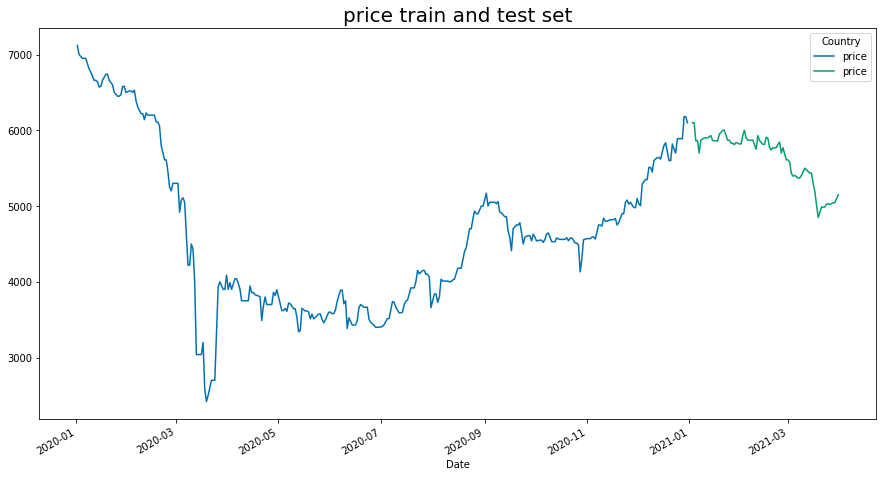

In [ ]:
# split data into test and train set
train, test = train_test(cb)
# plot the train and test set
plot_price_vol(train, test, 'price')

In [ ]:
len(cb), len(train), len(test)

(387, 310, 77)

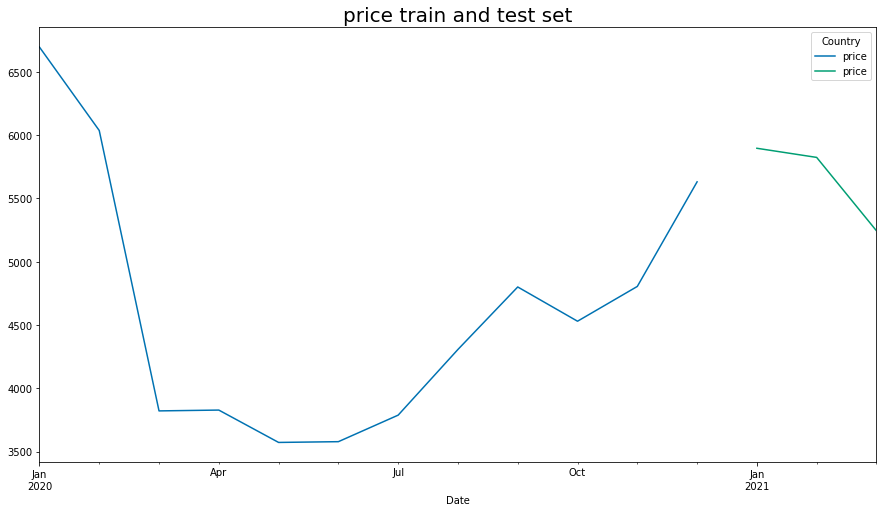

In [ ]:
#resample the dataset , split and plot 
# split data into test and train set

trainm, testm = train_test(cb.resample('M').mean().dropna())

# plot the train and test set
plot_price_vol(trainm, testm, 'price')

In [ ]:

#import pmdarima as pm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def find_order(train, column, p, q, d):
    import warnings
    warnings.filterwarnings("ignore")
    # Create empty list to store search results
    order_aic_bic=[]

    # Loop over p values 
    for p in range(0,9):
      # Loop over q values 
        for q in range(0,2):
             # Loop over d values 
            for d in range(0,1): 
                try:
                # create and fit ARMA(p,q) model
                    model = SARIMAX(train[[col]], order=(p,d,q))
                    results = model.fit()    
                # Append order and results tuple
                    order_aic_bic.append((p,q,d, results.aic, results.bic))
                except:
                    print(p, q, None, None)
                    #continue
    # Construct DataFrame from order_aic_bic
    order_df = pd.DataFrame(order_aic_bic,columns=['p', 'q','d', 'AIC', 'BIC'])

    # Print order_df in order of increasing AIC
    #order_df.sort_values('AIC').head(2)
    # Print order_df in order of increasing BIC
    #order_df.sort_values('BIC').head(2)
    
    return order_df

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values 
for p in range(0,9):
  # Loop over q values 
    for q in range(0,9):
         # Loop over d values 
        for d in range(0,3): 
            try:
            # create and fit ARMA(p,q) model
                model = SARIMAX(train[['price']], order=(p,d,q))
                results = model.fit()    
            # Append order and results tuple
                order_aic_bic.append((p,q,d, results.aic, results.bic))
            except:
                print(p, q, None, None)
                #continue
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q','d', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
order_df.sort_values('AIC').head(2)

p  q  d          AIC          BIC
227  8  3  2  3896.793258  3941.554455
212  7  7  2  3898.438332  3954.389829

In [ ]:
# Print order_df in order of increasing AIC
order_df.sort_values('AIC').head(5)
order_df.sort_values('AIC').tail(5)

p  q  d          AIC          BIC
227  8  3  2  3896.793258  3941.554455
212  7  7  2  3898.438332  3954.389829
215  7  8  2  3898.449336  3958.130932
206  7  5  2  3898.482302  3946.973599
152  5  5  2  3898.903074  3939.934171

p  q  d          AIC          BIC
12  0  4  0  5021.187530  5039.870392
9   0  3  0  5099.505700  5114.451990
6   0  2  0  5486.016208  5497.225925
3   0  1  0  5712.342758  5719.815903
0   0  0  0  6128.124635  6131.861207

In [ ]:
order_aic_bicm=[]

# Loop over p values 
for p in range(0,9):
  # Loop over q values 
    for q in range(0,9):
         # Loop over d values 
        for d in range(0,3): 
            try:
            # create and fit ARMA(p,q) model
                model = SARIMAX(trainm[['price']], order=(p,d,q))
                results = model.fit()    
            # Append order and results tuple
                order_aic_bicm.append((p,q,d, results.aic, results.bic))
            except:
                print(p, q, None, None)
                #continue
# Construct DataFrame from order_aic_bic
order_dfm = pd.DataFrame(order_aic_bicm, 
                        columns=['p', 'q','d', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
order_dfm.sort_values('AIC').head(5)

1 3 None None
1 3 None None
2 3 None None
2 3 None None
3 1 None None
3 2 None None
3 3 None None
3 3 None None
4 2 None None
4 3 None None
4 3 None None
5 3 None None
5 3 None None
6 0 None None
6 0 None None
6 0 None None
6 3 None None
6 3 None None
7 3 None None
7 3 None None
8 0 None None
8 1 None None
8 2 None None
8 3 None None
8 3 None None


p  q  d         AIC         BIC
129  5  1  2   14.000000   16.118096
199  8  1  1   20.000000   23.978953
198  8  1  0   20.000000   24.849066
11   0  3  2  164.717545  165.927885
54   2  0  2  166.139977  167.047732

In [ ]:
import numpy as np

In [ ]:
def sarimax_fit_plot_sum(trainm, col, p,q,d):
    # Fit model
    model_1 = SARIMAX(trainm[[col]], 
                      order=(p,d,q), 
                      trend='c')
    results_1 = model_1.fit()
    mae = np.mean(np.abs(results_1.resid)) # mean absolute error from residuals
    Summary= results_1.summary()
    # Make plot of time series for comparison #  four plots, shows us the distribution of the residuals
    Diagnostic = results_1.plot_diagnostics()
    plt.show()
    return Diagnostic, results_1, mae, Summary

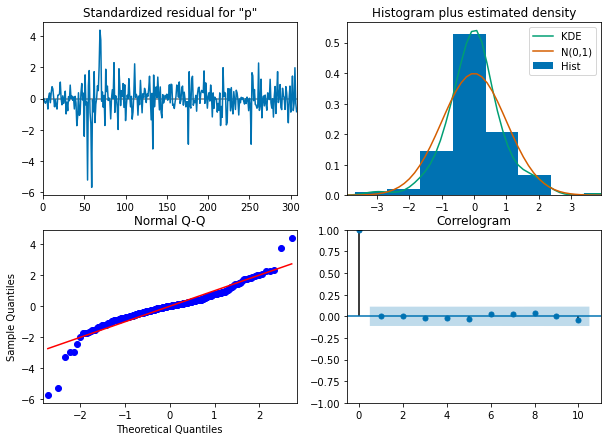

In [ ]:
Diagnostic, results_1, mae, Summary = sarimax_fit_plot_sum(train, 'price', 8,3,2)

In [ ]:
def sarimax_fit_plot_sum(trainm, col, p,q,d):
    # Fit model
    model_1 = SARIMAX(trainm[[col]], 
                      order=(p,d,q), 
                      trend='c')
    results_1 = model_1.fit()
    mae = np.mean(np.abs(results_1.resid)) # mean absolute error from residuals
    Summary= results_1.summary()
    # Make plot of time series for comparison #  four plots, shows us the distribution of the residuals
    Diagnostic = results_1.plot_diagnostics()
    plt.show()
    return Diagnostic, results_1, mae, Summary

In [ ]:
trainm[['price']]

Country      price
Date              
2020-01-02  7120.0
2020-01-03  7000.0
2020-01-05  6950.0
2020-01-06  6950.0
2020-01-07  6950.0
...            ...
2020-12-27  5890.0
2020-12-28  5890.0
2020-12-29  6180.0
2020-12-30  6180.0
2020-12-31  6100.0

[310 rows x 1 columns]

In [ ]:
model_1 = SARIMAX(trainm[['price']], 
                      order=(p,d,q), 
                      trend='c')
results_1 = model_1.fit()

In [ ]:
mae = np.mean(np.abs(results_1.resid)) # mean absolute error from residuals
Summary= results_1.summary()
#Summary

In [ ]:
results_1

ValueError: ignored

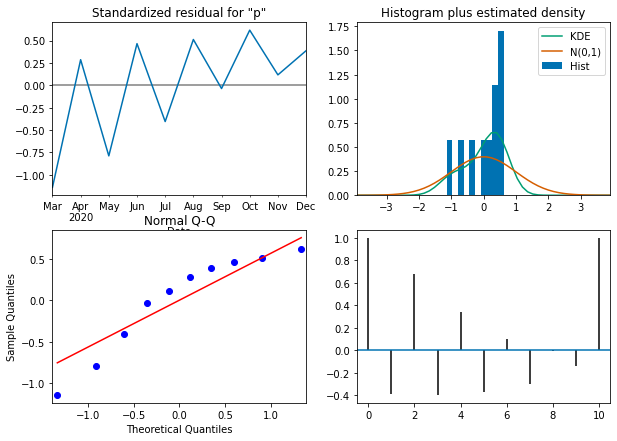

In [ ]:
Diagnostic = results_1.plot_diagnostics()
plt.show()

LinAlgError: ignored

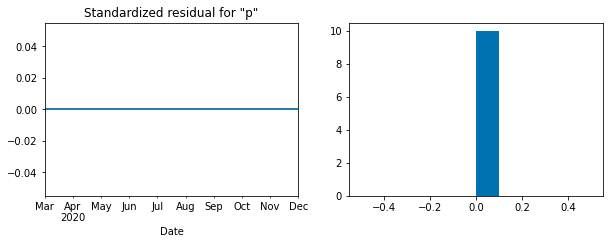

In [ ]:
Diagnostic, results_1, mae, Summary = sarimax_fit_plot_sum(trainm, 'price', 5,1,2)

In [ ]:
def sarimax_plot_origin_pred(trainm, col, p, d, q): # work with monthly and daily
    model_1 = SARIMAX(trainm[[col]],order=(p,d,q), trend='c')
    results_1 = model_1.fit()
    #Visualize the original dataset plotted against our model.
    fig, ax = plt.subplots(figsize=(10,7))  
    tr = trainm[col].plot(ax=ax)
    pred = results_1.predict().plot(ax=ax, color = 'red')#model_ny_con_fit
    
    plt.show()
    
    return tr, pred

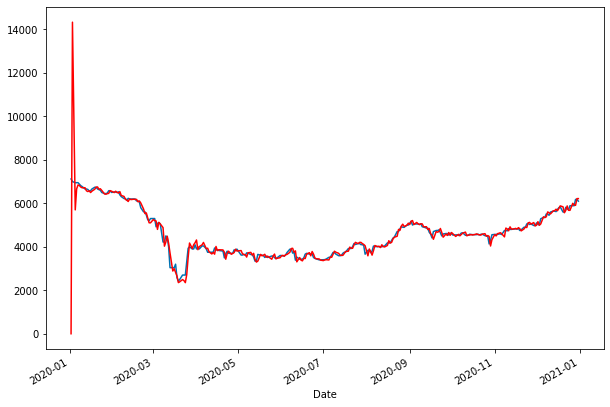

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7583f225e0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7583f225e0>)

In [ ]:
sarimax_plot_origin_pred(train, 'price', 8, 3, 2)

# Stock Market Predictions with LSTM

Long Short-Term Memory (LSTM) models are powerful, especially for retaining a long-term memory, by design, as you will see later. are extremely powerful time-series models. They can predict an arbitrary number of steps into the future. 
LSTM is suitable for processing Sequential Data.

In [9]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [10]:
df.head()

Price  Open  High  Low    Vol.  Change %  year  month  day  hour  \
Date                                                                           
2021-03-31    291   294   294  290  47.00M   -0.0076  2021      3   31     0   
2021-03-30    293   294   295  291  38.81M   -0.0002  2021      3   30     0   
2021-03-29    293   289   294  289  43.68M    0.0071  2021      3   29     0   
2021-03-26    291   288   292  288  56.07M    0.0159  2021      3   26     0   
2021-03-25    286   286   287  283  35.22M    0.0030  2021      3   25     0   

            weekday Country  
Date                         
2021-03-31        2  Russia  
2021-03-30        1  Russia  
2021-03-29        0  Russia  
2021-03-26        4  Russia  
2021-03-25        3  Russia

In [11]:
df.Country.unique()

array(['Russia', 'Turkey', 'Colombia', 'SouthAfrica', 'SouthKorea',
       'Egypt', 'Brazil', 'Argentina'], dtype=object)

In [26]:
dff=df.reset_index()
cb = dff[dff['Country']=='Colombia']
cb.drop(columns='Country', inplace=True)
cb.reset_index(inplace=True, drop=True)
cb.head()

Date  Price  Open  High   Low     Vol.  Change %  year  month  day  \
0 2021-03-31   5150  5100  5170  5100  212.44K    0.0098  2021      3   31   
1 2021-03-30   5100  5010  5100  5010  583.70K    0.0109  2021      3   30   
2 2021-03-29   5045  5020  5045  5015  117.54K    0.0050  2021      3   29   
3 2021-03-26   5020  5085  5085  4980  203.46K   -0.0020  2021      3   26   
4 2021-03-25   5030  5035  5045  4950  317.06K    0.0010  2021      3   25   

   hour  weekday  
0     0        2  
1     0        1  
2     0        0  
3     0        4  
4     0        3

In [27]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      303 non-null    datetime64[ns]
 1   Price     303 non-null    int64         
 2   Open      303 non-null    int64         
 3   High      303 non-null    int64         
 4   Low       303 non-null    int64         
 5   Vol.      303 non-null    object        
 6   Change %  303 non-null    float64       
 7   year      303 non-null    int64         
 8   month     303 non-null    int64         
 9   day       303 non-null    int64         
 10  hour      303 non-null    int64         
 11  weekday   303 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(9), object(1)
memory usage: 28.5+ KB


In [15]:
cb.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
year        0
month       0
day         0
hour        0
weekday     0
dtype: int64

In [ ]:
plt.plot()

In [ ]:
cb.shape[0]

303

In [ ]:
cb['Date'].loc[::303]

626   2021-03-31
Name: Date, dtype: datetime64[ns]

<Figure size 1296x648 with 0 Axes>

(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.,
        737850.]), <a list of 8 Text major ticklabel objects>)

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Mid Price')

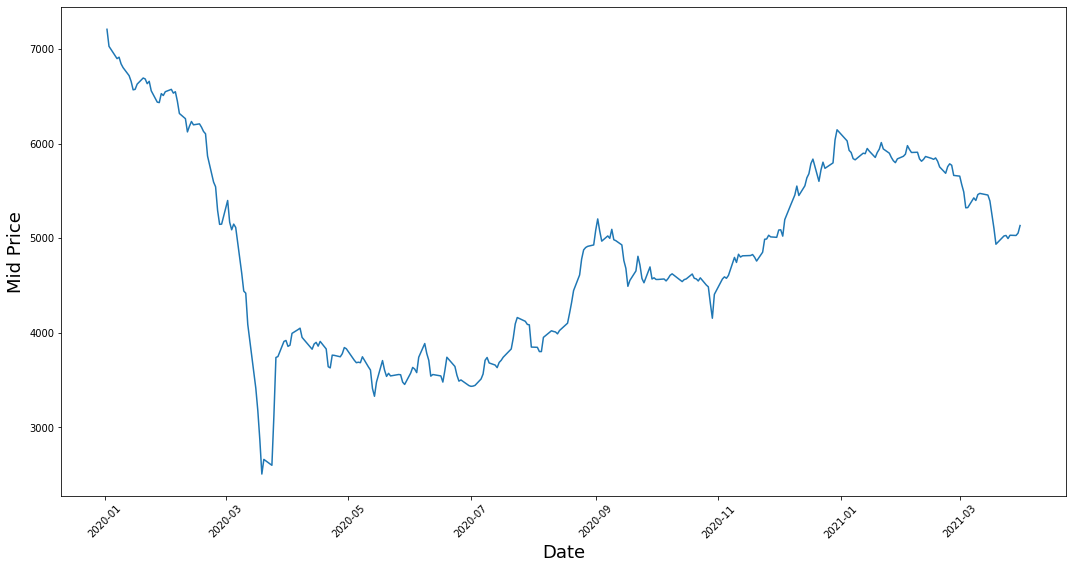

In [28]:
# 
plt.figure(figsize = (18,9))
plt.plot(cb.Date,(cb['Low']+cb['High'])/2.0)
#plt.plot(cb.Date,(cb['Open'])
plt.xticks(rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [ ]:
#https://github.com/jinglescode/time-series-forecasting-pytorch/blob/main/demo-predicting-stock-prices.ipynb

In [ ]:
#https://cnvrg.io/pytorch-lstm/

In [ ]:
#https://www.youtube.com/watch?v=CbTU92pbDKw

# one

https://cnvrg.io/pytorch-lstm/


https://github.com/abhinav-TB/Time-Series-Forecasting-Using-LSTM

In [43]:
cb.head()

Date  Price  Open  High   Low  Change %  year  month  day  hour  \
0 2021-03-31   5150  5100  5170  5100    0.0098  2021      3   31     0   
1 2021-03-30   5100  5010  5100  5010    0.0109  2021      3   30     0   
2 2021-03-29   5045  5020  5045  5015    0.0050  2021      3   29     0   
3 2021-03-26   5020  5085  5085  4980   -0.0020  2021      3   26     0   
4 2021-03-25   5030  5035  5045  4950    0.0010  2021      3   25     0   

   weekday  
0        2  
1        1  
2        0  
3        4  
4        3

In [42]:
cb.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %', 'year', 'month',
       'day', 'hour', 'weekday'],
      dtype='object')

In [41]:
cb = cb.drop(columns='Vol.') # manage later

In [44]:
cbd = cb.set_index('Date')
cbd.head(2)

Price  Open  High   Low  Change %  year  month  day  hour  weekday
Date                                                                          
2021-03-31   5150  5100  5170  5100    0.0098  2021      3   31     0        2
2021-03-30   5100  5010  5100  5010    0.0109  2021      3   30     0        1

In [45]:
cbd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 303 entries, 2021-03-31 to 2020-01-02
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     303 non-null    int64  
 1   Open      303 non-null    int64  
 2   High      303 non-null    int64  
 3   Low       303 non-null    int64  
 4   Change %  303 non-null    float64
 5   year      303 non-null    int64  
 6   month     303 non-null    int64  
 7   day       303 non-null    int64  
 8   hour      303 non-null    int64  
 9   weekday   303 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 26.0 KB


In [46]:
X = cbd.iloc[:, :1]
y = cbd.iloc[:, 1:]
X.head(2)
y.head(2)

Price
Date             
2021-03-31   5150
2021-03-30   5100

Open  High   Low  Change %  year  month  day  hour  weekday
Date                                                                   
2021-03-31  5100  5170  5100    0.0098  2021      3   31     0        2
2021-03-30  5010  5100  5010    0.0109  2021      3   30     0        1

In [73]:
X_trainn = cbd[cbd['year']== 2020].iloc[:, 1:]
X_testt = cbd[cbd['year']== 2021].iloc[:, 1:]
y_trainn = cbd[cbd['year']== 2020].iloc[:, :1]
y_testt = cbd[cbd['year']== 2021].iloc[:, :1]

In [52]:
# Split the data into a train and test set
def train_test(df):
    train = df.loc[:'2020']
    test = df.loc['2021':]
    return train, test 

In [74]:
len(X_trainn), len(X_testt), len(y_trainn), len(y_testt)

(242, 61, 242, 61)

In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()


X_train = ss.fit_transform(X_trainn)
y_train = mm.fit_transform(y_trainn) 
X_test = ss.fit_transform(X_testt)
y_test = mm.fit_transform(y_testt)

In [79]:
X_train[:2], y_train[:2]

(array([[ 1.47225008,  1.51245282,  1.40037982, -0.00391113,  0.        ,
          1.59141661,  1.60164407,  0.        , -0.03622684],
        [ 1.20350316,  1.42019339,  1.28506241,  1.20563389,  0.        ,
          1.59141661,  1.48814542,  0.        , -0.76680141]]), array([[0.8],
        [0.8]]))

In [80]:
print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

Training Shape (242, 9) (242, 1)
Testing Shape (61, 9) (61, 1)


In [81]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

In [82]:
# convert the Numpy Arrays to Tensors and to Variables 
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

In [83]:
X_train_tensors

tensor([[ 1.4723,  1.5125,  1.4004,  ...,  1.6016,  0.0000, -0.0362],
        [ 1.2035,  1.4202,  1.2851,  ...,  1.4881,  0.0000, -0.7668],
        [ 1.0163,  1.1386,  1.0977,  ...,  1.3746,  0.0000, -1.4974],
        ...,
        [ 2.2113,  2.1680,  2.1980,  ..., -1.0088,  0.0000, -0.7668],
        [ 2.2977,  2.3137,  2.3037,  ..., -1.4628,  0.0000,  1.4249],
        [ 2.5472,  2.5079,  2.4575,  ..., -1.5763,  0.0000,  0.6943]])

In [84]:
#reshaping to rows, timestamps, features

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))


X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

In [85]:
#Now you can confirm the shape of the dataset via printing the shapes.
print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape)

Training Shape torch.Size([242, 1, 9]) torch.Size([242, 1])
Testing Shape torch.Size([61, 1, 9]) torch.Size([61, 1])


In [86]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [110]:
num_epochs = 5000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 9 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers or Number of recurrent layers

num_classes = 1 #number of output classes 

In [98]:
X_train_tensors_final.shape

torch.Size([242, 1, 9])

In [111]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 

In [106]:
lstm1

LSTM1(
  (lstm): LSTM(9, 2, batch_first=True)
  (fc_1): Linear(in_features=2, out_features=128, bias=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

In [112]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [113]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.81817
Epoch: 100, loss: 0.03022
Epoch: 200, loss: 0.00625
Epoch: 300, loss: 0.00359
Epoch: 400, loss: 0.00284
Epoch: 500, loss: 0.00242
Epoch: 600, loss: 0.00162
Epoch: 700, loss: 0.00085
Epoch: 800, loss: 0.00041
Epoch: 900, loss: 0.00029
Epoch: 1000, loss: 0.00022
Epoch: 1100, loss: 0.00018
Epoch: 1200, loss: 0.00016
Epoch: 1300, loss: 0.00014
Epoch: 1400, loss: 0.00013
Epoch: 1500, loss: 0.00012
Epoch: 1600, loss: 0.00011
Epoch: 1700, loss: 0.00011
Epoch: 1800, loss: 0.00010
Epoch: 1900, loss: 0.00010
Epoch: 2000, loss: 0.00009
Epoch: 2100, loss: 0.00009
Epoch: 2200, loss: 0.00009
Epoch: 2300, loss: 0.00008
Epoch: 2400, loss: 0.00008
Epoch: 2500, loss: 0.00008
Epoch: 2600, loss: 0.00008
Epoch: 2700, loss: 0.00007
Epoch: 2800, loss: 0.00007
Epoch: 2900, loss: 0.00007
Epoch: 3000, loss: 0.00007
Epoch: 3100, loss: 0.00007
Epoch: 3200, loss: 0.00007
Epoch: 3300, loss: 0.00006
Epoch: 3400, loss: 0.00006
Epoch: 3500, loss: 0.00006
Epoch: 3600, loss: 0.00006
Epoch: 3700, 

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Time-Series Prediction')

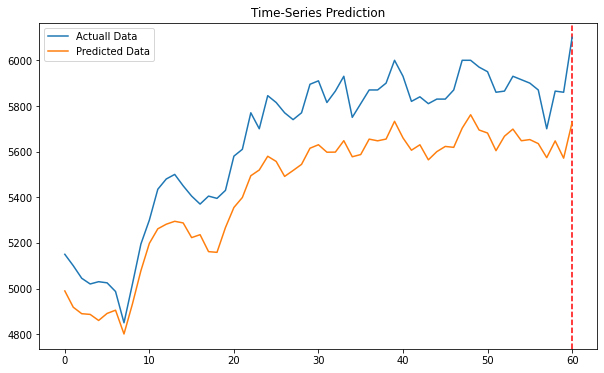

In [114]:
train_predict = lstm1(X_test_tensors_final)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = y_test_tensors.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=60, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

# two